In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [5]:
df = pd.read_csv("country_stats.csv")
df.head()

country          Region Surface area (km2)  \
0     Afghanistan    SouthernAsia             652864   
1         Albania  SouthernEurope              28748   
2         Algeria  NorthernAfrica            2381741   
3  American Samoa       Polynesia                199   
4         Andorra  SouthernEurope                468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                                -99   
4                                               2812   

  Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
0                            23.3                          23.3   
1                            22.4                          26.0   
2                            12.2                          37.3   
3                             -99                         -99.0   
4                             0.5                          10.8   

   Economy: Services and other activity (% of GVA)  ...  \
0                                             53.3  ...   
1                                             51.7  ...   
2                                             50.5  ...   
3                                            -99.0  ...   
4                                             88.6  ...   

  International trade: Balance (million US$)  \
0                                      -2110   
1                                      -2707   
2                                     -17099   
3                                        -99   
4                                      -1255   

  Fertility rate, total (live births per woman)  \
0                                           5.3   
1                                           1.7   
2                                             3   
3                                           2.6   
4                                           1.2   

  Infant mortality rate (per 1000 live births)  \
0                                         68.6   
1                                         14.6   
2                                         27.7   
3                                          9.6   
4                                          -99   

  Health: Total expenditure (% of GDP)  \
0                                  8.2   
1                                  5.9   
2                                  7.2   
3                                -99.0   
4                                  8.1   

  Education: Government expenditure (% of GDP)  \
0                                          3.3   
1                                          3.5   
2                                          ...   
3                                          -99   
4                                          3.3   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              106.4     
2                                                113     
3                                                ...     
4                                               88.1     

  Individuals using the Internet (per 100 inhabitants)  \
0                                                 42     
1     

In [3]:
# checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                229 non-null    object 
 1   Region                                                 229 non-null    object 
 2   Surface area (km2)                                     229 non-null    object 
 3   Population in thousands (2017)                         229 non-null    int64  
 4   Population density (per km2, 2017)                     229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                          229 non-null    float64
 6   GDP: Gross domestic product (million current US$)      229 non-null    int64  
 7   Economy: Agriculture (% of GVA)                        229 non-null    object 
 8   Economy: Industry (% of GVA)                      

In [4]:
df.tail()

country          Region Surface area (km2)  \
224  Wallis and Futuna Islands       Polynesia                142   
225             Western Sahara  NorthernAfrica             266000   
226                      Yemen     WesternAsia             527968   
227                     Zambia   EasternAfrica             752612   
228                   Zimbabwe   EasternAfrica             390757   

     Population in thousands (2017)  Population density (per km2, 2017)  \
224                              12                                84.1   
225                             553                                 2.1   
226                           28250                                53.5   
227                           17094                                23.0   
228                           16530                                42.7   

     Sex ratio (m per 100 f, 2017)  \
224                           93.4   
225                          110.1   
226                          102.1   
227                           98.5   
228                           95.0   

     GDP: Gross domestic product (million current US$)  \
224                                                -99   
225                                                -99   
226                                              29688   
227                                              21255   
228                                              13893   

    Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
224                             -99                         -99.0   
225                             -99                         -99.0   
226                            14.7                          36.9   
227                             8.2                          32.3   
228                              13                          30.5   

     Economy: Services and other activity (% of GVA)  ...  \
224                                            -99.0  ...   
225                                            -99.0  ...   
226                                             48.4  ...   
227                                             59.5  ...   
228                                             56.5  ...   

    International trade: Balance (million US$)  \
224                                        -51   
225                                        -99   
226                                      -6291   
227                                       -937   
228                                      -2379   

    Fertility rate, total (live births per woman)  \
224                                           2.1   
225                                           2.6   
226                                           4.4   
227                                           5.2   
228                                             4   

    Infant mortality rate (per 1000 live births)  \
224                                          ...   
225                                         34.1   
226                                         47.2   
227                                         53.8   
228                                         46.5   

    Health: Total expenditure (% of GDP)  \
224                                -99.0   
225                                -99.0   
226                                  5.6   
227                                  5.0   
228                                  6.0   

    Education: Government expenditure (% of GDP)  \
224                                          -99   
225                                          -99   
226                                          ...   
227                                          ...   
228                                          8.4   

     Mobile-cellular subscriptions (per 100 inhabitants)  \
224                                                -99     
225                                                -99     
226                                                 68     
227                                           

In [6]:
# Convert object variables to numeric safely
integers = ['Surface area (km2)', 'International trade: Exports (million US$)',
            'International trade: Imports (million US$)', 'International trade: Balance (million US$)']

numbers = ['Economy: Agriculture (% of GVA)', 'Fertility rate, total (live births per woman)',
           'Infant mortality rate (per 1000 live births)', 'Education: Government expenditure (% of GDP)',
           'Mobile-cellular subscriptions (per 100 inhabitants)', 'Threatened species (number)']

# Convert integer columns, replace invalid values with 0
for integer in integers:
    df[integer] = pd.to_numeric(df[integer], errors='coerce').fillna(0).astype(int)
# Convert float columns, replace invalid values with 0
for number in numbers:
    df[number] = pd.to_numeric(df[number], errors='coerce').fillna(0).astype(float)


In [7]:
# checking for missing data
df.isna().sum()

country                                                  0
Region                                                   0
Surface area (km2)                                       0
Population in thousands (2017)                           0
Population density (per km2, 2017)                       0
Sex ratio (m per 100 f, 2017)                            0
GDP: Gross domestic product (million current US$)        0
Economy: Agriculture (% of GVA)                          0
Economy: Industry (% of GVA)                             0
Economy: Services and other activity (% of GVA)          0
International trade: Exports (million US$)               0
International trade: Imports (million US$)               0
International trade: Balance (million US$)               0
Fertility rate, total (live births per woman)            0
Infant mortality rate (per 1000 live births)             0
Health: Total expenditure (% of GDP)                     0
Education: Government expenditure (% of GDP)             0
Mobile-cellular subscriptions (per 100 inhabitants)      0
Individuals using the Internet (per 100 inhabitants)     0
Threatened species (number)                              0
CO2 emission estimates (million tons/tons per capita)    0
Energy production, primary (Petajoules)                  0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# checking for missing data
df.isna().sum()

country                                                  0
Region                                                   0
Surface area (km2)                                       0
Population in thousands (2017)                           0
Population density (per km2, 2017)                       0
Sex ratio (m per 100 f, 2017)                            0
GDP: Gross domestic product (million current US$)        0
Economy: Agriculture (% of GVA)                          0
Economy: Industry (% of GVA)                             0
Economy: Services and other activity (% of GVA)          0
International trade: Exports (million US$)               0
International trade: Imports (million US$)               0
International trade: Balance (million US$)               0
Fertility rate, total (live births per woman)            0
Infant mortality rate (per 1000 live births)             0
Health: Total expenditure (% of GDP)                     0
Education: Government expenditure (% of GDP)             0
Mobile-cellular subscriptions (per 100 inhabitants)      0
Individuals using the Internet (per 100 inhabitants)     0
Threatened species (number)                              0
CO2 emission estimates (million tons/tons per capita)    0
Energy production, primary (Petajoules)                  0
dtype: int64

In [8]:
# List of variables where -99 needs to be replaced with the median by region
variables = ['Surface area (km2)', 'International trade: Exports (million US$)',
             'International trade: Imports (million US$)', 'International trade: Balance (million US$)',
             'Economy: Agriculture (% of GVA)', 'Fertility rate, total (live births per woman)', 'Sex ratio (m per 100 f, 2017)',
             'GDP: Gross domestic product (million current US$)', 'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)',
             'Health: Total expenditure (% of GDP)', 'Individuals using the Internet (per 100 inhabitants)', 'CO2 emission estimates (million tons/tons per capita)',
             'Infant mortality rate (per 1000 live births)', 'Education: Government expenditure (% of GDP)', 'Energy production, primary (Petajoules)',
             'Mobile-cellular subscriptions (per 100 inhabitants)', 'Threatened species (number)']

# Check if 'Region' column exists
if 'Region' in df.columns:
    # Replace -99 with the median by region
    for variable in variables:
        if variable in df.columns:
            # Replace -99 with median for each region
            df[variable] = df.groupby('Region')[variable].transform(
                lambda x: x.replace(-99, x[x != -99].median()) if not x.isnull().all() else x
            )
        else:
            print(f"Warning: Column {variable} does not exist in the dataframe.")
else:
    print("Error: 'Region' column not found in the dataframe.")


In [10]:
df.describe().T

count           mean  \
Surface area (km2)                                  229.0  589984.231441   
Population in thousands (2017)                      229.0   32756.794760   
Population density (per km2, 2017)                  229.0     462.824891   
Sex ratio (m per 100 f, 2017)                       229.0     101.925328   
GDP: Gross domestic product (million current US$)   229.0  330230.593886   
Economy: Agriculture (% of GVA)                     229.0      11.081004   
Economy: Industry (% of GVA)                        229.0      26.835590   
Economy: Services and other activity (% of GVA)     229.0      61.667686   
International trade: Exports (million US$)          229.0   72113.262009   
International trade: Imports (million US$)          229.0   72657.519651   
International trade: Balance (million US$)          229.0    -505.947598   
Fertility rate, total (live births per woman)       229.0       2.707642   
Infant mortality rate (per 1000 live births)        229.0      23.385371   
Health: Total expenditure (% of GDP)                229.0       6.894760   
Education: Government expenditure (% of GDP)        229.0       3.432314   
Mobile-cellular subscriptions (per 100 inhabita...  229.0     103.760044   
Individuals using the Internet (per 100 inhabit...  229.0     199.288210   
Threatened species (number)                         229.0      32.060262   
CO2 emission estimates (million tons/tons per c...  229.0    2487.912664   
Energy production, primary (Petajoules)             229.0      88.229258   

                                                             std       min  \
Surface area (km2)                                  1.784711e+06       0.0   
Population in thousands (2017)                      1.332751e+05       1.0   
Population density (per km2, 2017)                  2.305384e+03       0.1   
Sex ratio (m per 100 f, 2017)                       2.124724e+01      83.5   
GDP: Gross domestic product (million current US$)   1.478016e+06      33.0   
Economy: Agriculture (% of GVA)                     1.174253e+01       0.0   
Economy: Industry (% of GVA)                        1.290925e+01       4.0   
Economy: Services and other activity (% of GVA)     1.515569e+01      14.9   
International trade: Exports (million US$)          2.171037e+05       0.0   
International trade: Imports (million US$)          2.197719e+05       0.0   
International trade: Balance (million US$)          7.011853e+04 -796494.0   
Fertility rate, total (live births per woman)       1.436155e+00       0.0   
Infant mortality rate (per 1000 live births)        2.271715e+01       0.0   
Health: Total expenditure (% of GDP)                2.736866e+00       1.5   
Education: Government expenditure (% of GDP)        2.436659e+00       0.0   
Mobile-cellular subscriptions (per 100 inhabita...  4.558042e+01       0.0   
Individuals using the Internet (per 100 inhabit...  2.959997e+02       1.0   
Threatened species (number)                         2.415950e+01       0.0   
CO2 emission estimates (million tons/tons per c...  9.907497e+03       0.0   
Energy production, primary (Petajoules)             1.160666e+02       2.0   

                                                       25%      50%  \
Surface area (km2)                                  4033.0  83871.0   
Population in thousands (2017)                       431.0   5448.0   
Population density (per km2, 2017)                    35.9     88.1   
Sex ratio (m per 100 f, 2017)                         96.6     99.0   
GDP: Gross domestic product (million current US$)   4385.0  21315.0   
Economy: Agriculture (% of GVA)                        2.3      7.1   
Economy: Industry (% of GVA)                          18.1     26.3   
Economy: Services and other activity (% of GVA)       51.7     62.5   
International trade: Exports (million US$)           517.0   3741.0   
International trade: Imports (million US$)          1244.0   6721.0   
International trade: Balance (milli

In [9]:
row, column = df.shape

print(f"The data has {row} rows and {column} columns")

The data has 229 rows and 22 columns


In [10]:
# Descriptive statistics
df.describe().T

count           mean  \
Surface area (km2)                                  229.0  589984.231441   
Population in thousands (2017)                      229.0   32756.794760   
Population density (per km2, 2017)                  229.0     462.824891   
Sex ratio (m per 100 f, 2017)                       229.0     101.925328   
GDP: Gross domestic product (million current US$)   229.0  330230.593886   
Economy: Agriculture (% of GVA)                     229.0      11.081004   
Economy: Industry (% of GVA)                        229.0      26.835590   
Economy: Services and other activity (% of GVA)     229.0      61.667686   
International trade: Exports (million US$)          229.0   72113.262009   
International trade: Imports (million US$)          229.0   72657.519651   
International trade: Balance (million US$)          229.0    -505.947598   
Fertility rate, total (live births per woman)       229.0       2.707642   
Infant mortality rate (per 1000 live births)        229.0      23.385371   
Health: Total expenditure (% of GDP)                229.0       6.894760   
Education: Government expenditure (% of GDP)        229.0       3.432314   
Mobile-cellular subscriptions (per 100 inhabita...  229.0     103.760044   
Individuals using the Internet (per 100 inhabit...  229.0     199.288210   
Threatened species (number)                         229.0      32.060262   
CO2 emission estimates (million tons/tons per c...  229.0    2487.912664   
Energy production, primary (Petajoules)             229.0      88.229258   

                                                             std       min  \
Surface area (km2)                                  1.784711e+06       0.0   
Population in thousands (2017)                      1.332751e+05       1.0   
Population density (per km2, 2017)                  2.305384e+03       0.1   
Sex ratio (m per 100 f, 2017)                       2.124724e+01      83.5   
GDP: Gross domestic product (million current US$)   1.478016e+06      33.0   
Economy: Agriculture (% of GVA)                     1.174253e+01       0.0   
Economy: Industry (% of GVA)                        1.290925e+01       4.0   
Economy: Services and other activity (% of GVA)     1.515569e+01      14.9   
International trade: Exports (million US$)          2.171037e+05       0.0   
International trade: Imports (million US$)          2.197719e+05       0.0   
International trade: Balance (million US$)          7.011853e+04 -796494.0   
Fertility rate, total (live births per woman)       1.436155e+00       0.0   
Infant mortality rate (per 1000 live births)        2.271715e+01       0.0   
Health: Total expenditure (% of GDP)                2.736866e+00       1.5   
Education: Government expenditure (% of GDP)        2.436659e+00       0.0   
Mobile-cellular subscriptions (per 100 inhabita...  4.558042e+01       0.0   
Individuals using the Internet (per 100 inhabit...  2.959997e+02       1.0   
Threatened species (number)                         2.415950e+01       0.0   
CO2 emission estimates (million tons/tons per c...  9.907497e+03       0.0   
Energy production, primary (Petajoules)             1.160666e+02       2.0   

                                                       25%      50%  \
Surface area (km2)                                  4033.0  83871.0   
Population in thousands (2017)                       431.0   5448.0   
Population density (per km2, 2017)                    35.9     88.1   
Sex ratio (m per 100 f, 2017)                         96.6     99.0   
GDP: Gross domestic product (million current US$)   4385.0  21315.0   
Economy: Agriculture (% of GVA)                        2.3      7.1   
Economy: Industry (% of GVA)                          18.1     26.3   
Economy: Services and other activity (% of GVA)       51.7     62.5   
International trade: Exports (million US$)           517.0   3741.0   
International trade: Imports (million US$)          1244.0   6721.0   
International trade: Balance (milli

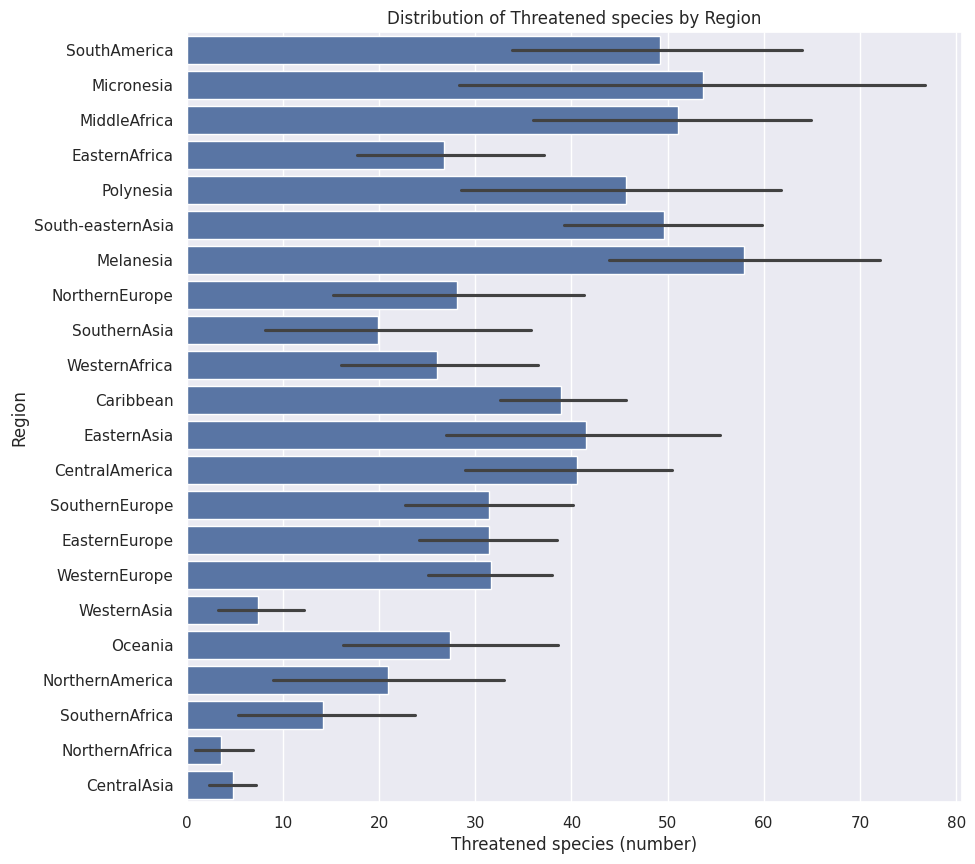

In [11]:
df_sorted = df.sort_values(by = 'Threatened species (number)', ascending = False)
# Visualization
plt.figure(figsize=(10, 10))
sns.barplot(data=df_sorted, y='Region', x='Threatened species (number)')
plt.title("Distribution of Threatened species by Region")
plt.show()

<ipython-input-12-f5522a2d5435>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),


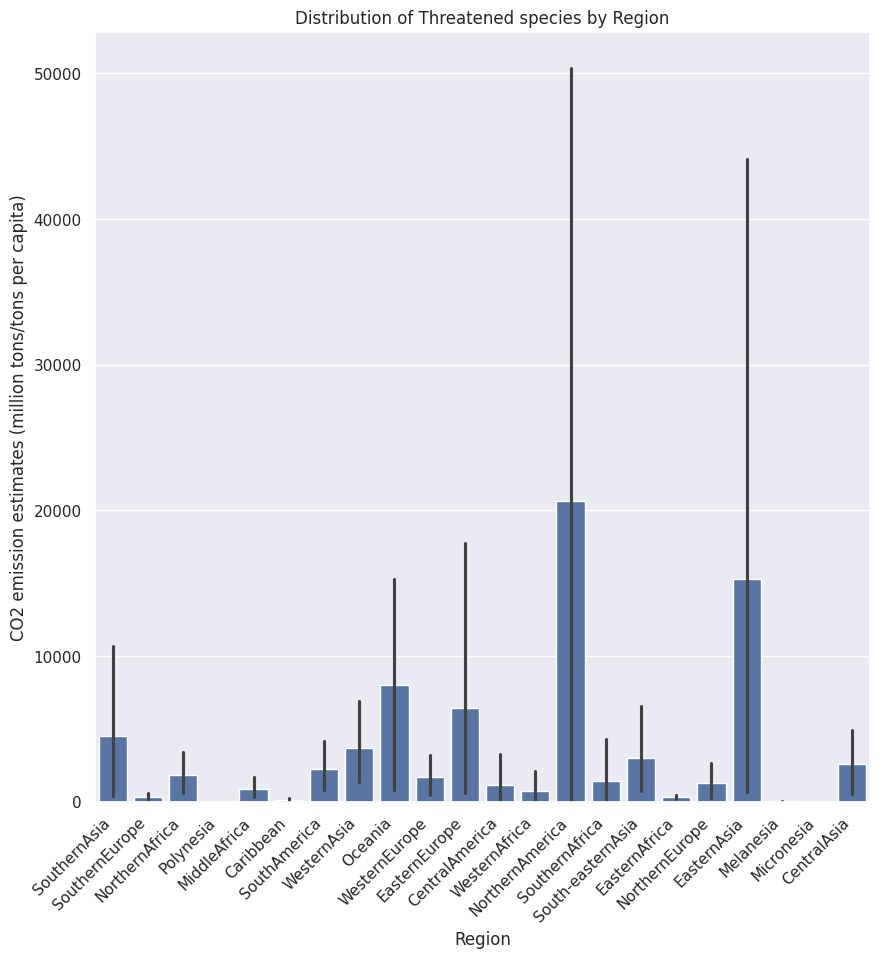

In [12]:
# Checking Population Density by region
# Visualization
plt.figure(figsize=(10, 10))
bar = sns.barplot(data=df, x='Region', y='CO2 emission estimates (million tons/tons per capita)')
bar.set_xticklabels(bar.get_xticklabels(),
                   rotation = 45,
                   horizontalalignment = 'right')
plt.title("Distribution of Threatened species by Region")

plt.show()

<ipython-input-13-cd98cfbe7f11>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),


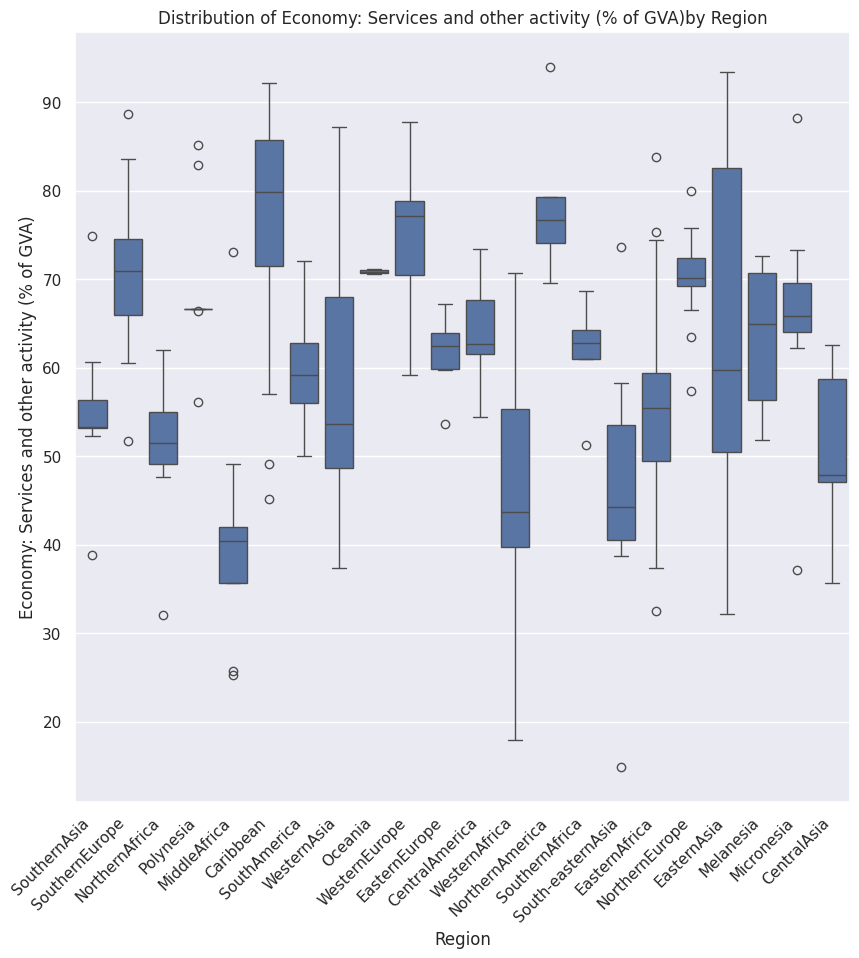

In [13]:
# Visualization
plt.figure(figsize=(10, 10))
bar = sns.boxplot(data=df, x='Region', y='Economy: Services and other activity (% of GVA)')
bar.set_xticklabels(bar.get_xticklabels(),
                   rotation = 45,
                   horizontalalignment = 'right')
plt.title("Distribution of Economy: Services and other activity (% of GVA)by Region")

plt.show()

In [14]:
countries = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")


In [15]:
countries = countries.drop(['country_code', 'usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'], axis = 1)
df = pd.merge(countries, df, on="country")

In [16]:
df.head()

latitude  longitude               country          Region  \
0  42.546245   1.601554               Andorra  SouthernEurope   
1  23.424076  53.847818  United Arab Emirates     WesternAsia   
2  33.939110  67.709953           Afghanistan    SouthernAsia   
3  17.060816 -61.796428   Antigua and Barbuda       Caribbean   
4  18.220554 -63.068615              Anguilla       Caribbean   

   Surface area (km2)  Population in thousands (2017)  \
0               468.0                              77   
1             83600.0                            9400   
2            652864.0                           35530   
3               442.0                             102   
4                91.0                              15   

   Population density (per km2, 2017)  Sex ratio (m per 100 f, 2017)  \
0                               163.8                          102.3   
1                               112.4                          262.4   
2                                54.4                          106.3   
3                               231.8                           92.3   
4                               165.7                           97.6   

   GDP: Gross domestic product (million current US$)  \
0                                             2812.0   
1                                           370296.0   
2                                            20270.0   
3                                             1356.0   
4                                              320.0   

   Economy: Agriculture (% of GVA)  ...  \
0                              0.5  ...   
1                              0.7  ...   
2                             23.3  ...   
3                              1.9  ...   
4                              2.3  ...   

   International trade: Balance (million US$)  \
0                                       -1255   
1                                       -6296   
2                                       -2110   
3                                        -429   
4                                        -153   

   Fertility rate, total (live births per woman)  \
0                                            1.2   
1                                            1.8   
2                                            5.3   
3                                            2.1   
4                                            0.0   

   Infant mortality rate (per 1000 live births)  \
0                                           4.0   
1                                           6.2   
2                                          68.6   
3                                           9.1   
4                                           9.6   

   Health: Total expenditure (% of GDP)  \
0                                   8.1   
1                                   3.6   
2                                   8.2   
3                                   5.5   
4                                   6.1   

   Education: Government expenditure (% of GDP)  \
0                                           3.3   
1                                           2.6   
2                                           3.3   
3                                           0.0   
4                                           0.0   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               88.1     
1                                              187.4     
2                                               61.6     
3                                              137.2     
4                                              177.9     

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 13      
1                                                 56      
2                                                 42      
3                                                 55      
4                                                 52      

   Threatened species (number)  \
0                     

In [17]:
df.columns

Index(['latitude', 'longitude', 'country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Fertility rate, total (live births per woman)',
       'Infant mortality rate (per 1000 live births)',
       'Health: Total expenditure (% of GDP)',
       'Education: Government expenditure (% of GDP)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Individuals using the Internet (per 100 inhabitants)',
       'Threatened species (number)',
       'CO2 emission estimates (million tons/tons per capita)',
       'Energy 

In [18]:
from mpl_toolkits.basemap import Basemap

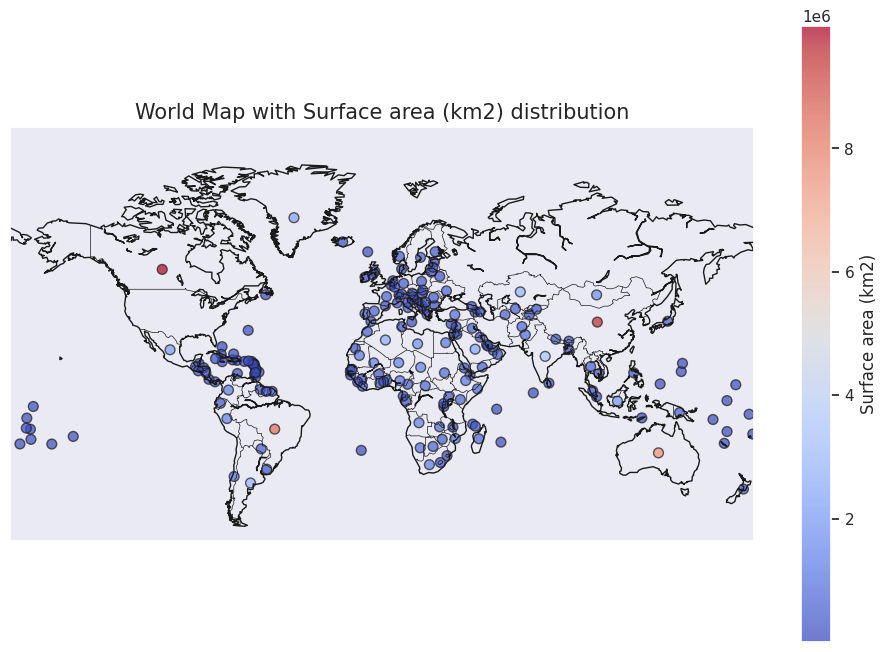

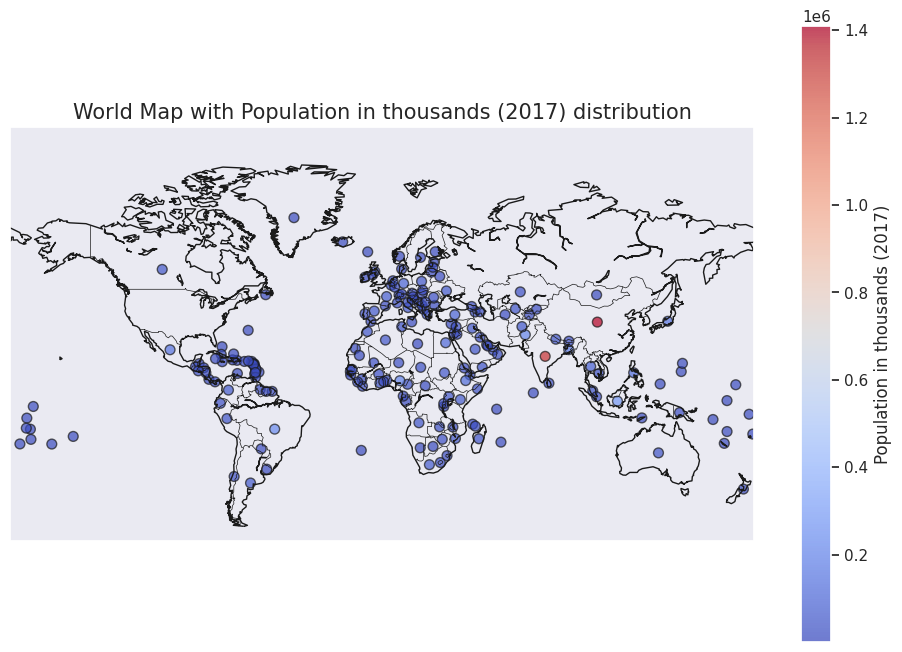

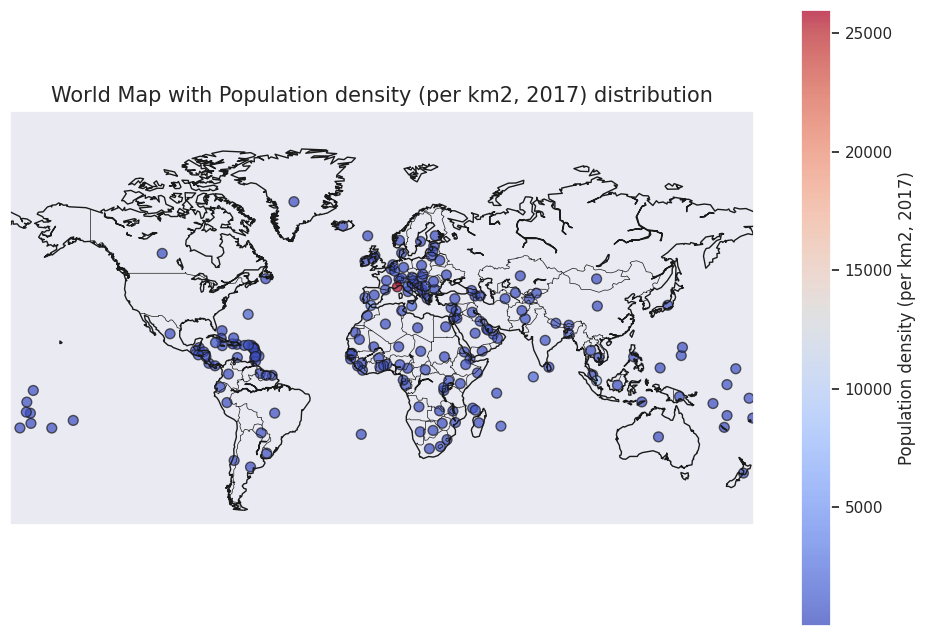

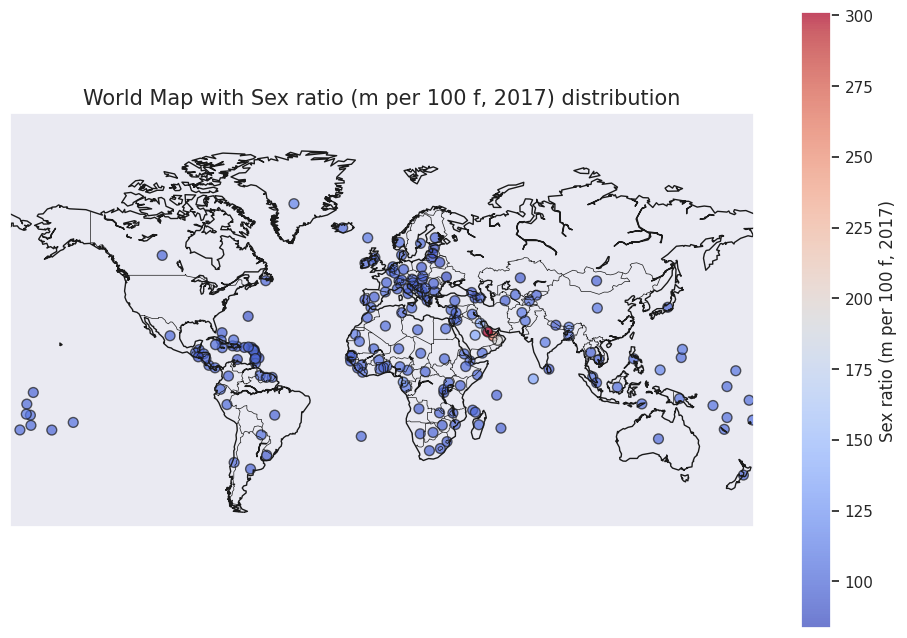

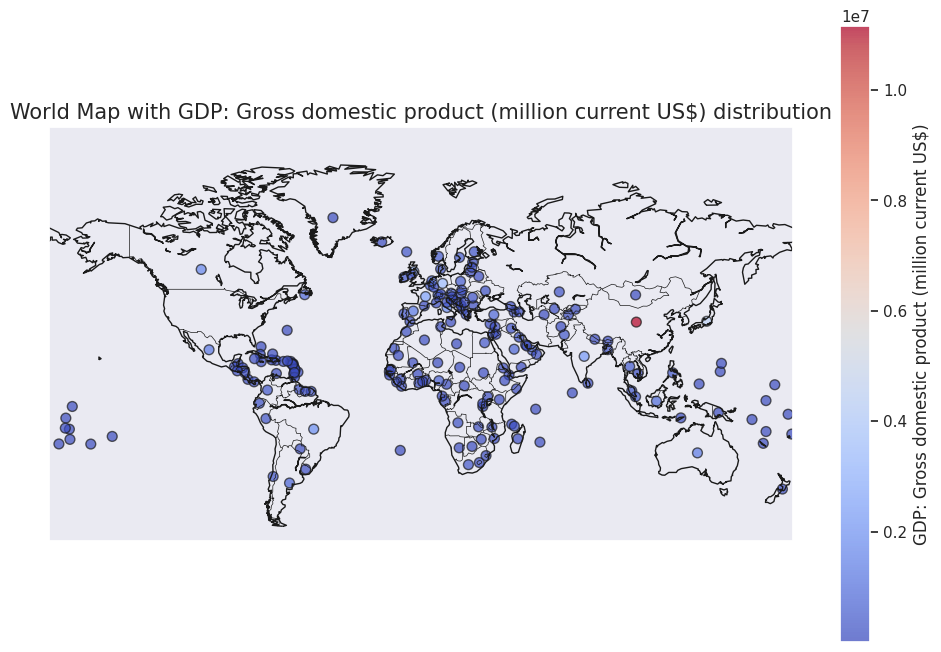

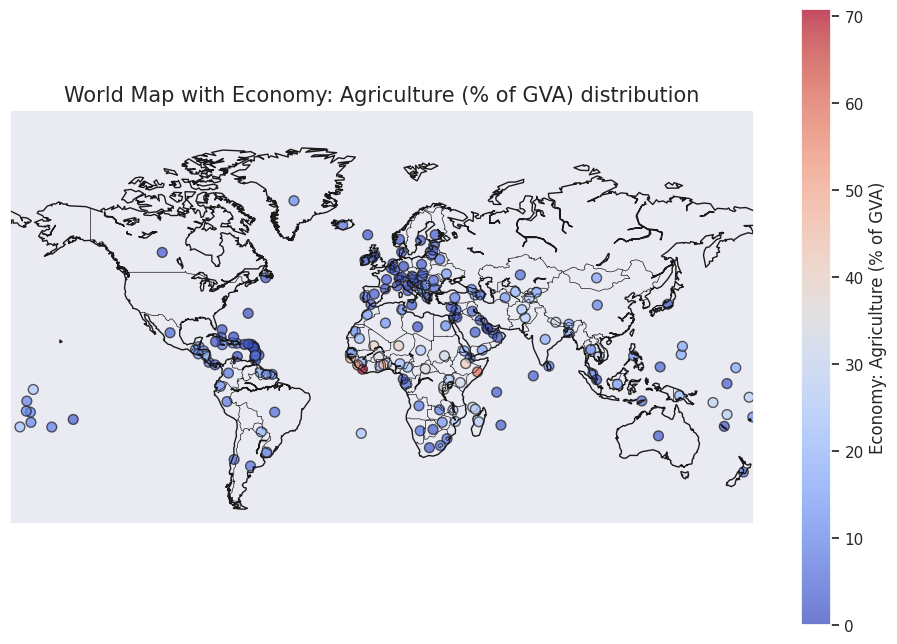

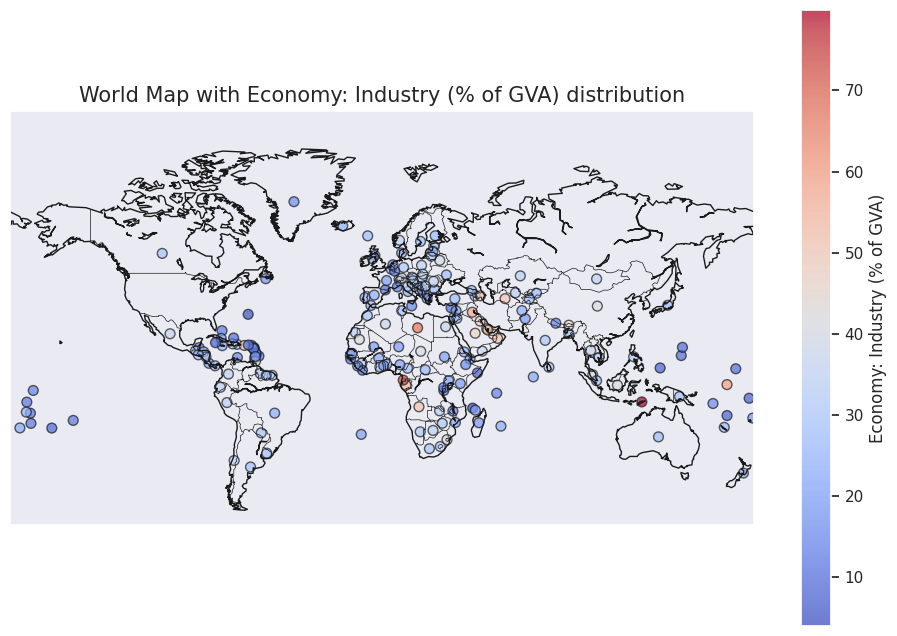

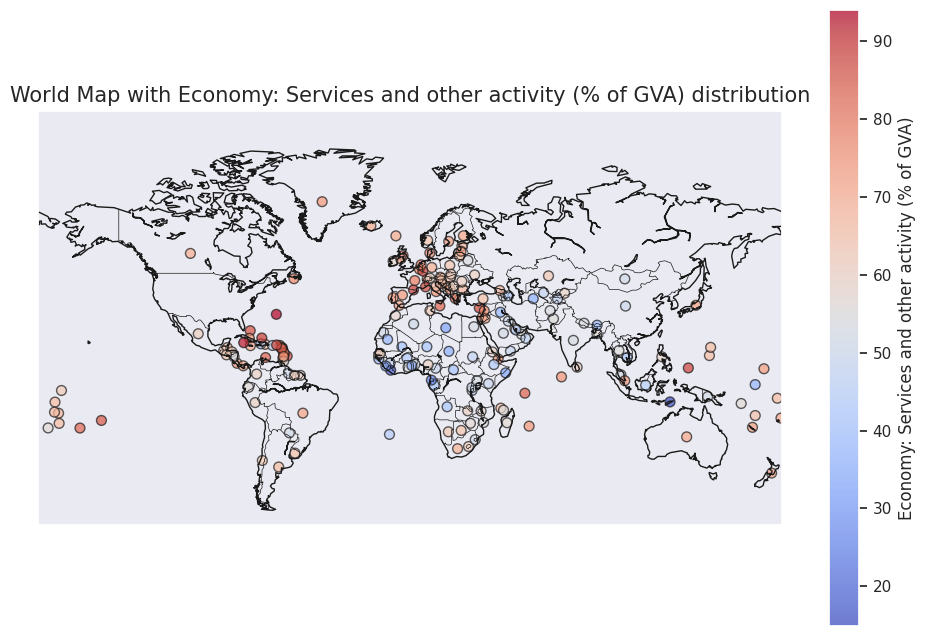

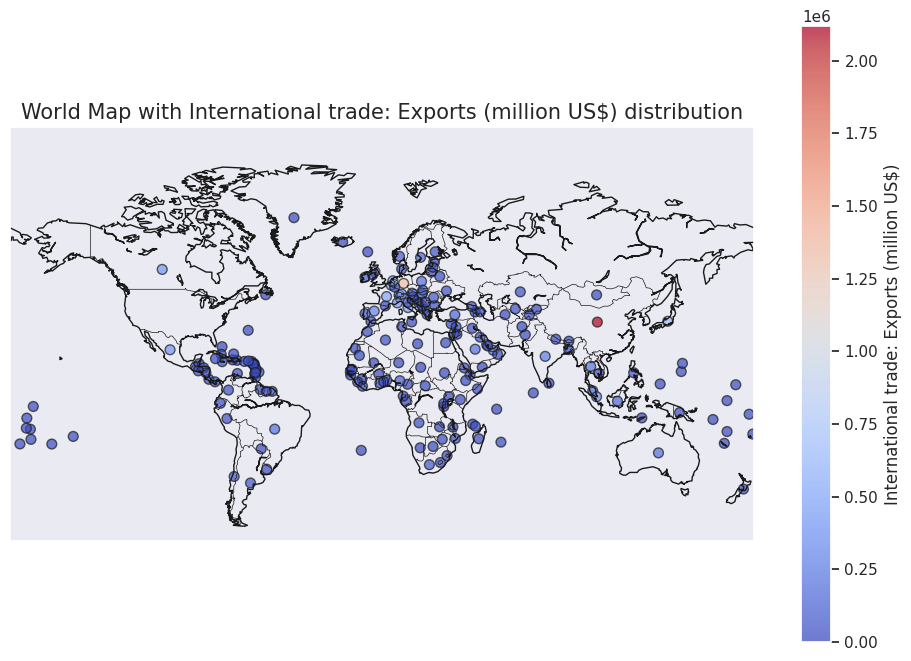

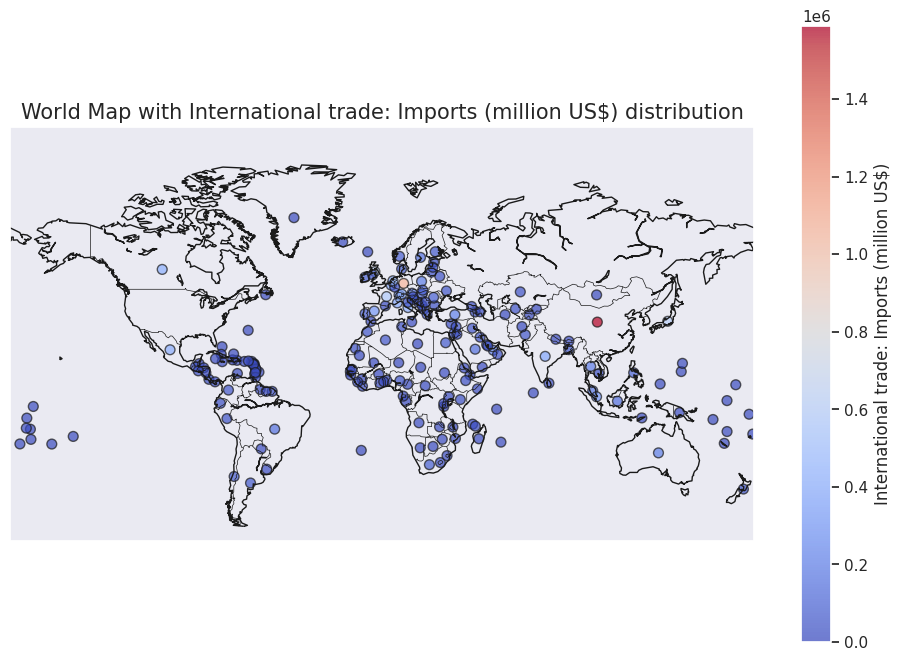

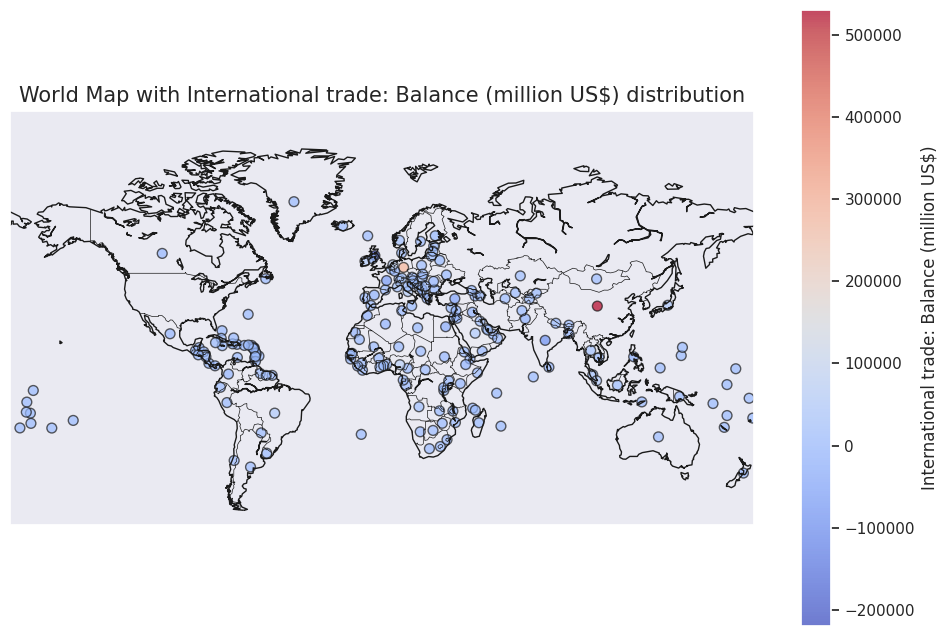

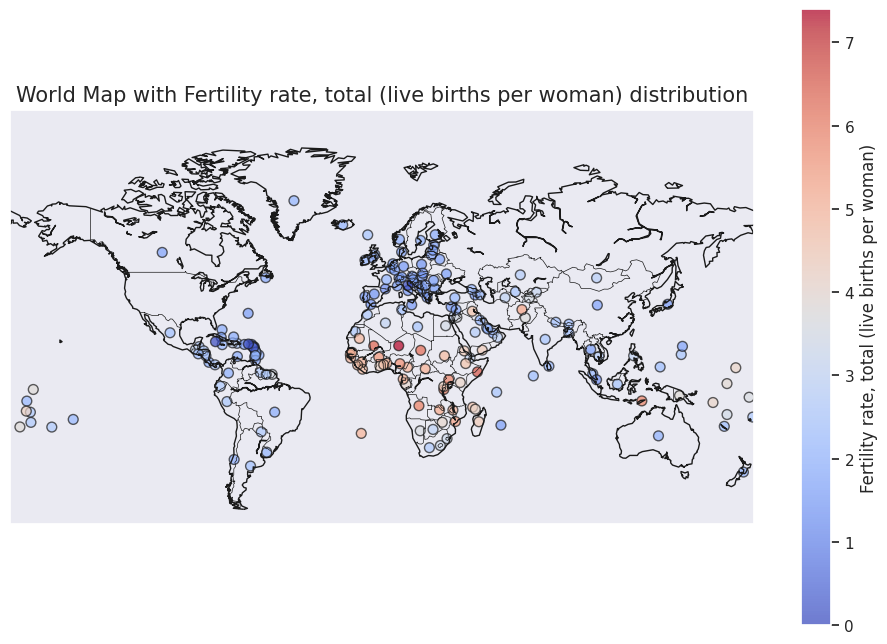

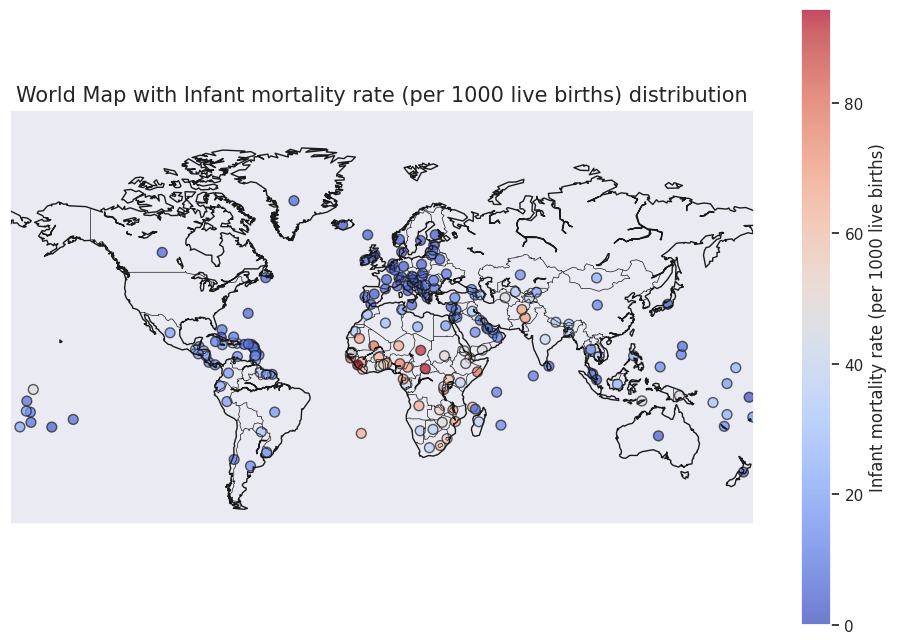

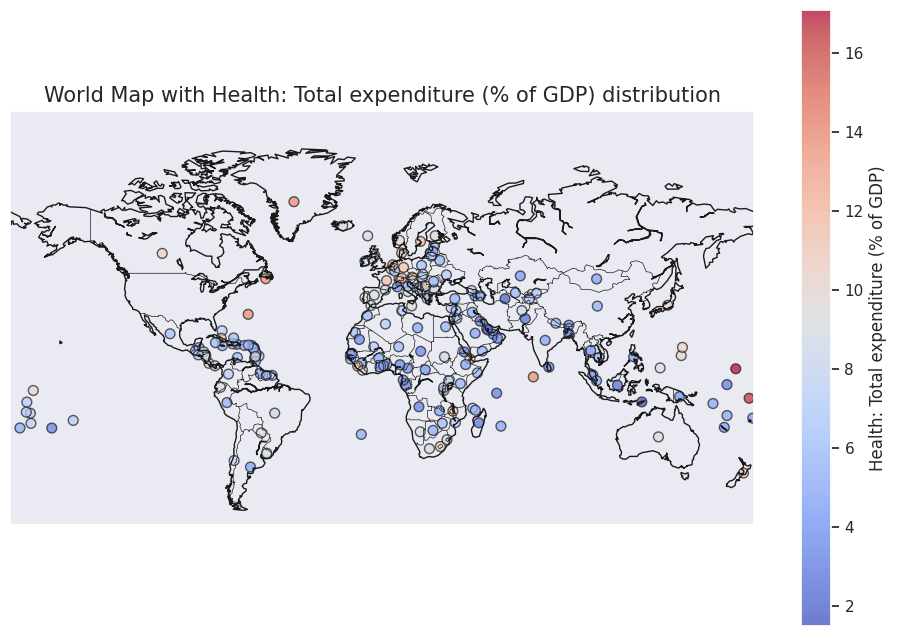

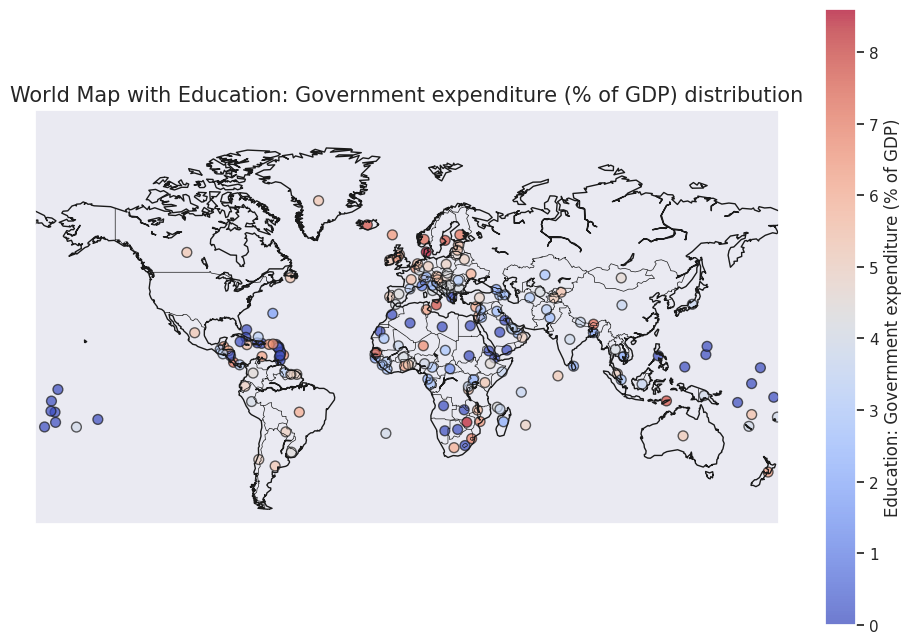

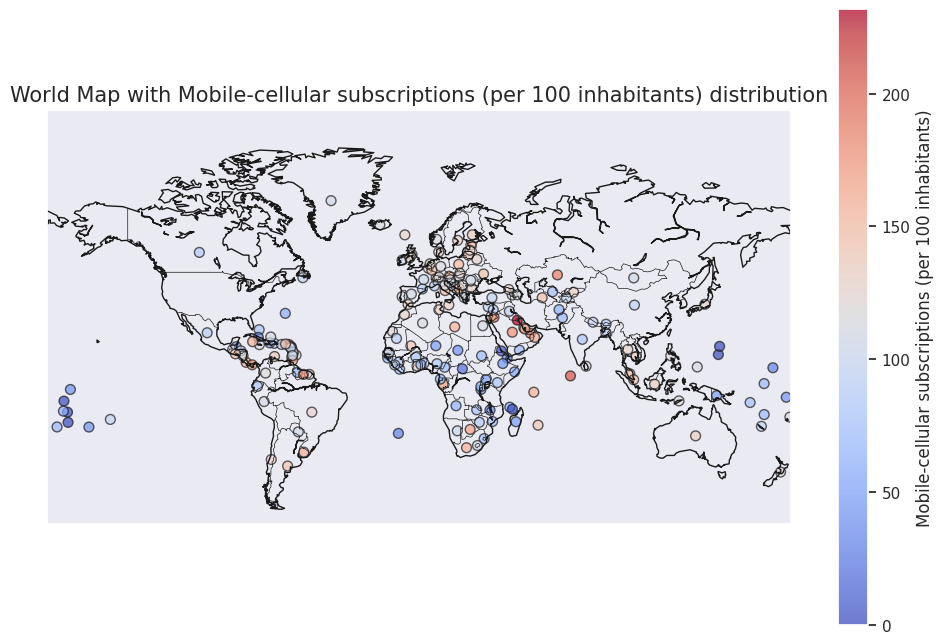

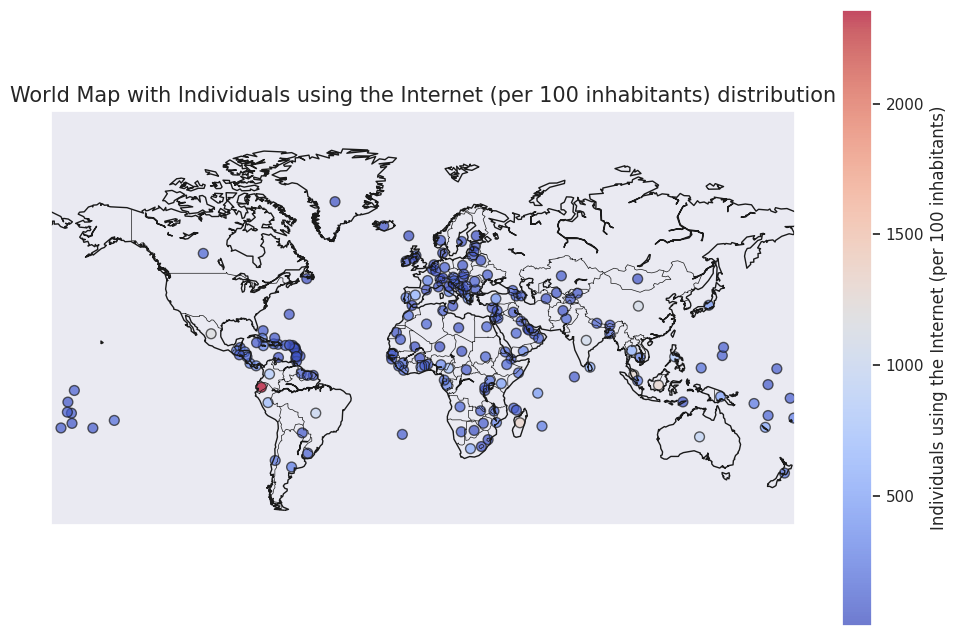

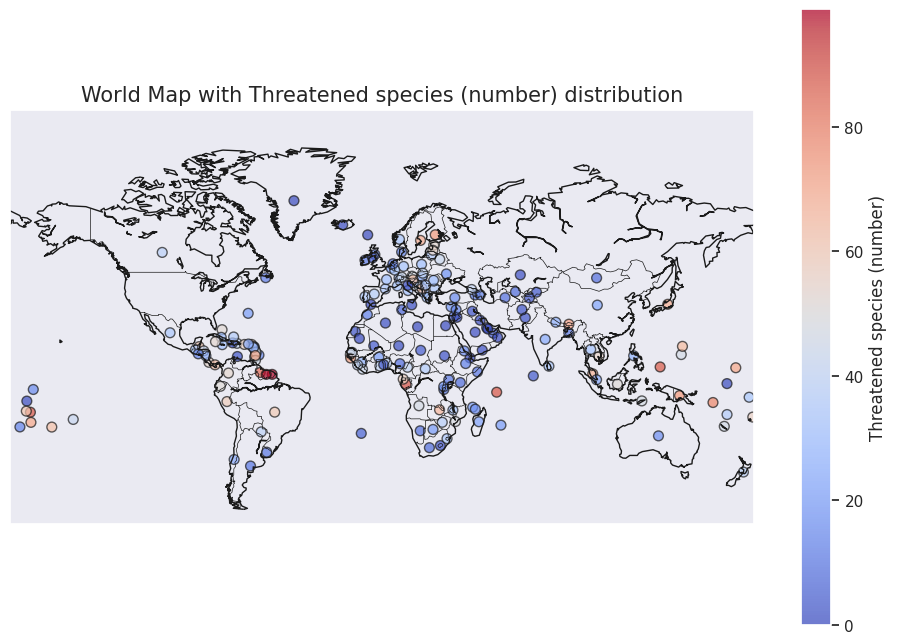

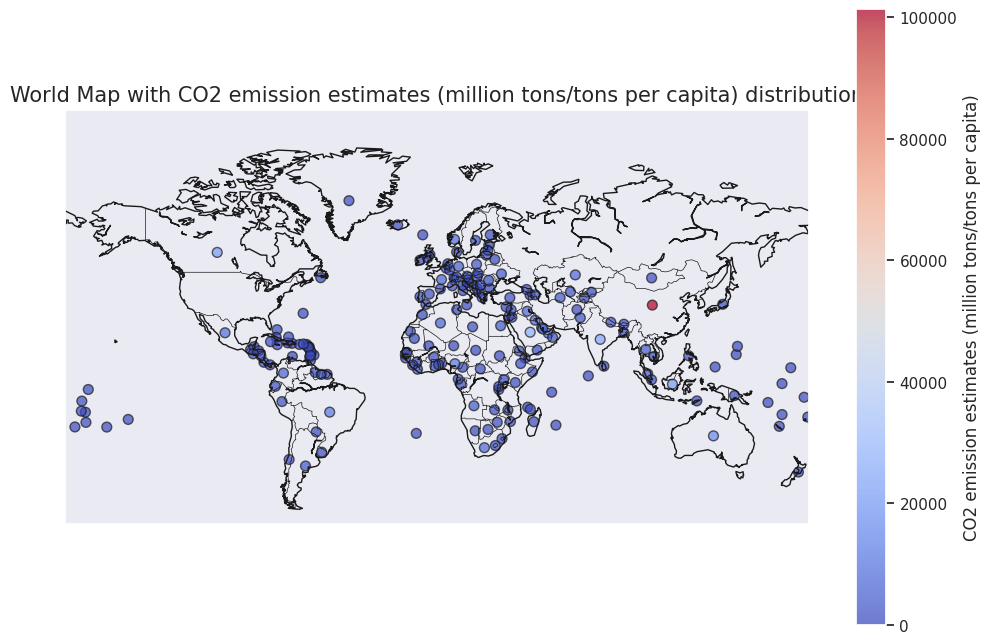

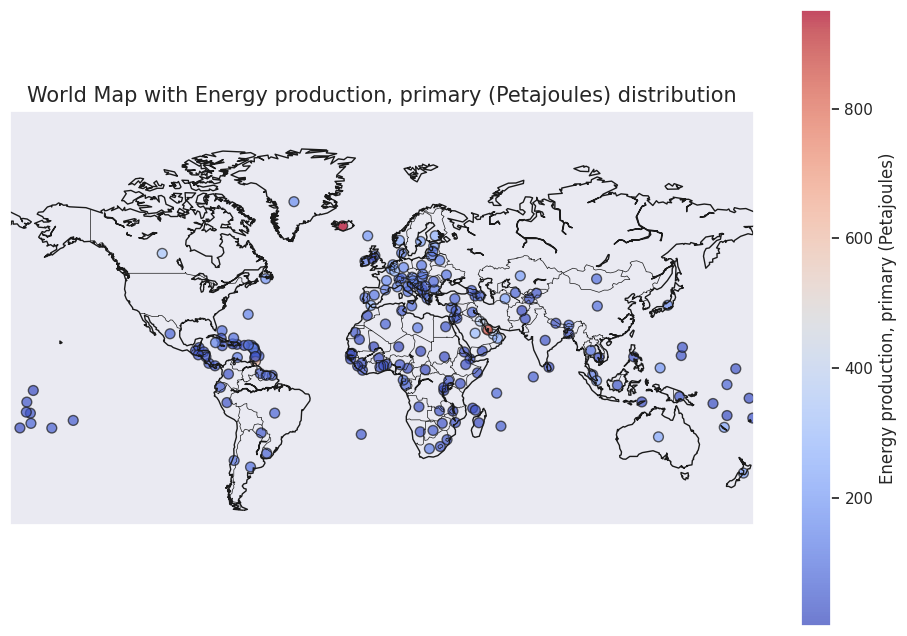

In [34]:
variables = ['Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)', 'GDP: Gross domestic product (million current US$)', 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)',
       'International trade: Balance (million US$)', 'Fertility rate, total (live births per woman)','Infant mortality rate (per 1000 live births)','Health: Total expenditure (% of GDP)',
       'Education: Government expenditure (% of GDP)','Mobile-cellular subscriptions (per 100 inhabitants)','Individuals using the Internet (per 100 inhabitants)',
       'Threatened species (number)','CO2 emission estimates (million tons/tons per capita)','Energy production, primary (Petajoules)']

for variable in variables:
          # Extract latitude and longitude
          latitudes = df['latitude']
          longitudes = df['longitude']

          # Create the map
          plt.figure(figsize=(12, 8))
          m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

          # Draw coastlines and countries
          m.drawcoastlines()
          m.drawcountries()

          # Convert lat/lon to map projection coordinates
          x, y = m(longitudes.values, latitudes.values)


          # Plot the points
          m.scatter(x, y, c=df[variable], cmap='coolwarm', s=50, edgecolor='k', alpha=0.7)

          # Add title and show plot
          plt.title(f'World Map with {variable} distribution', fontsize=15)
          plt.colorbar(label=f'{variable}')
          plt.show()








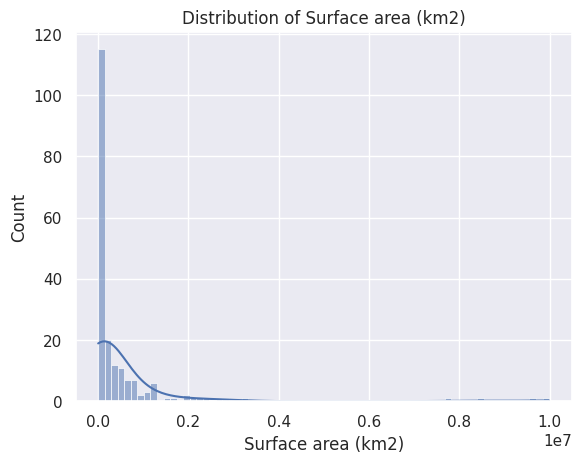

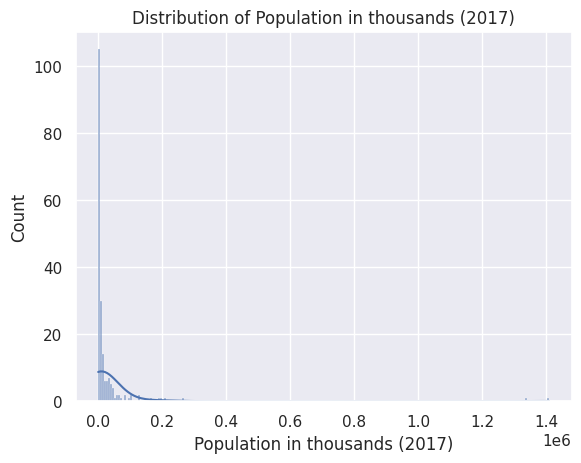

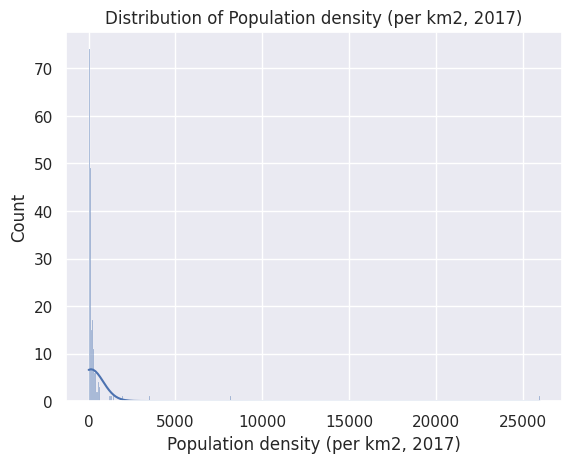

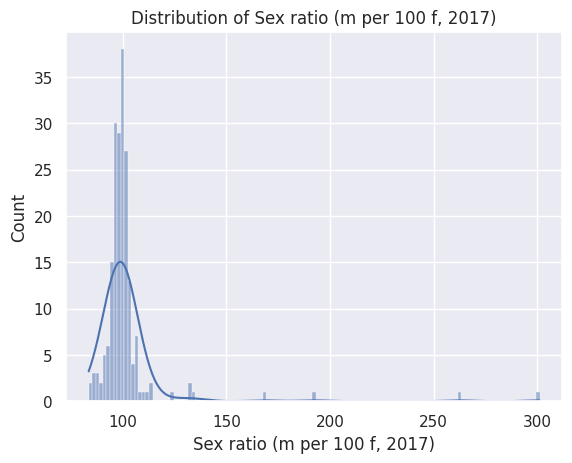

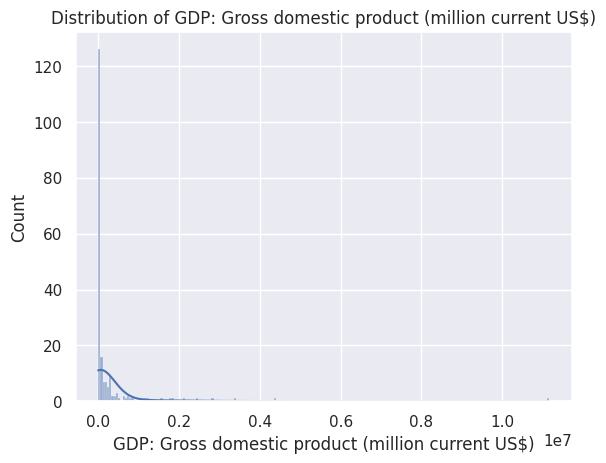

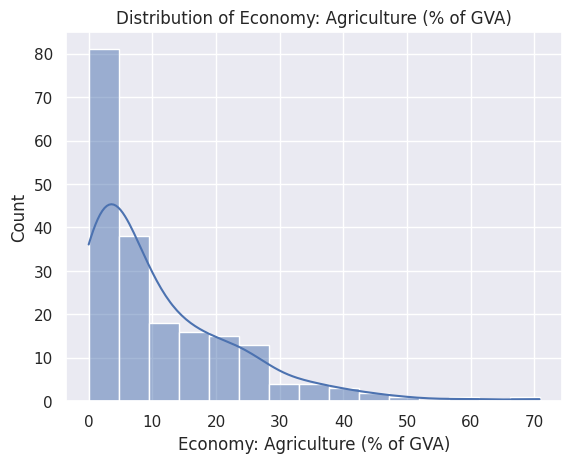

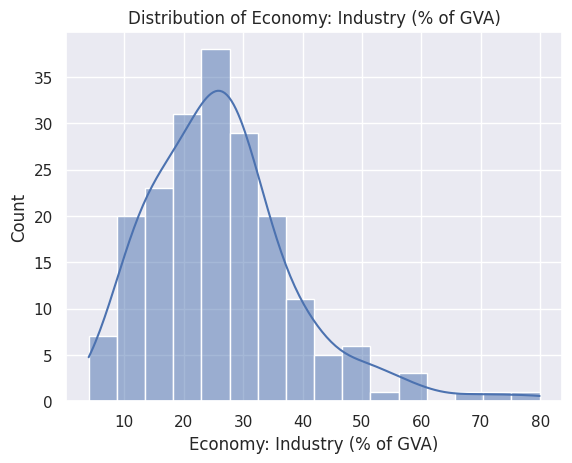

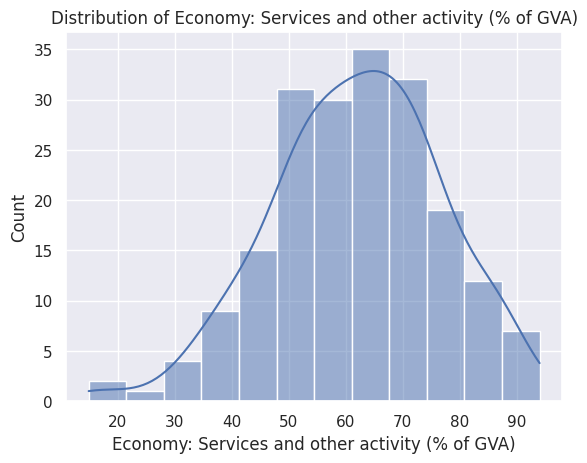

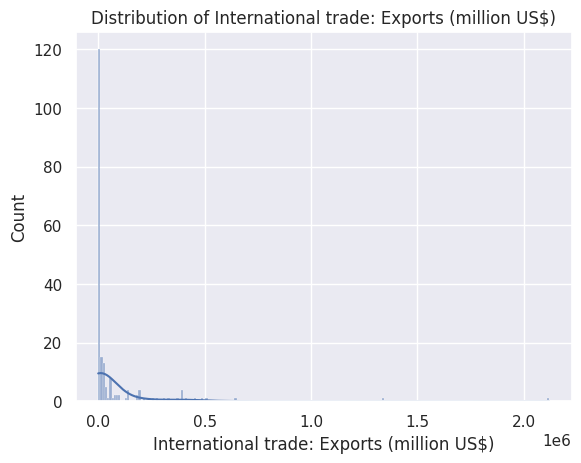

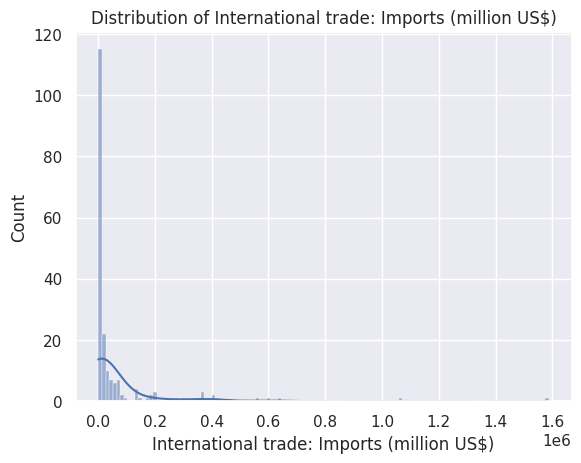

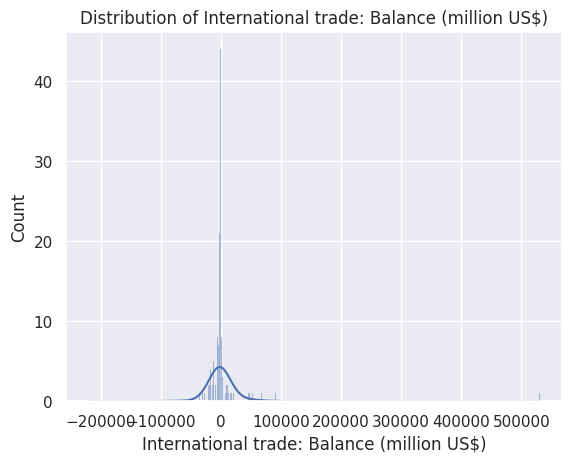

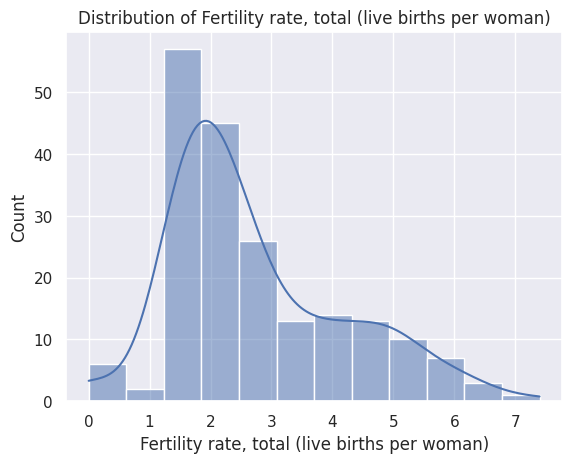

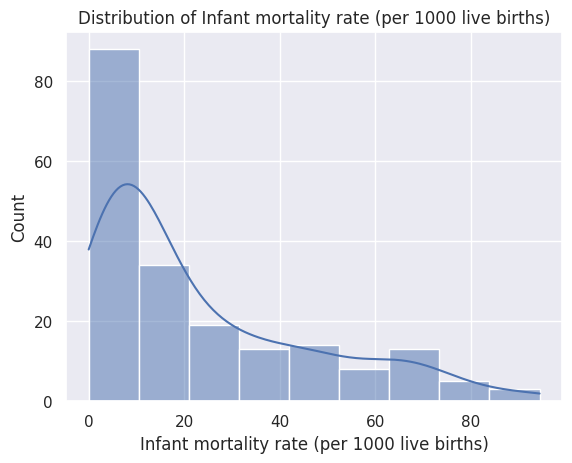

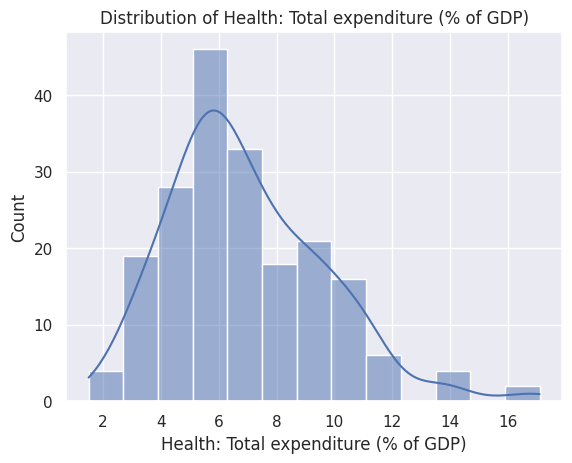

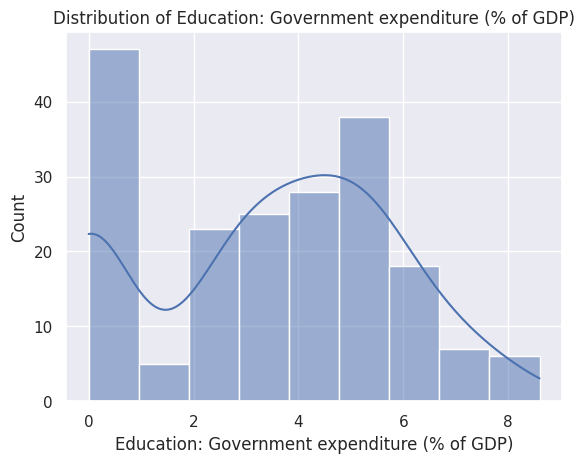

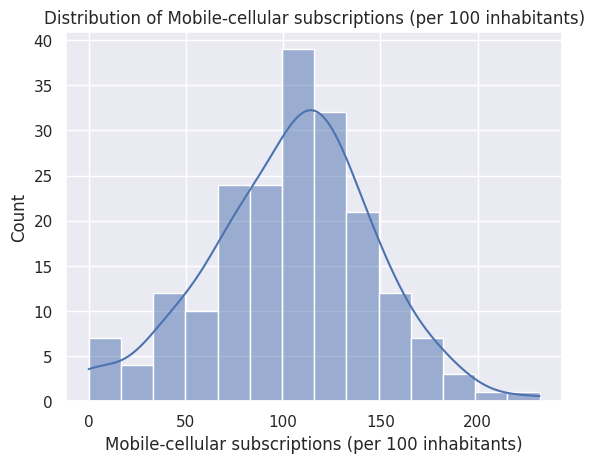

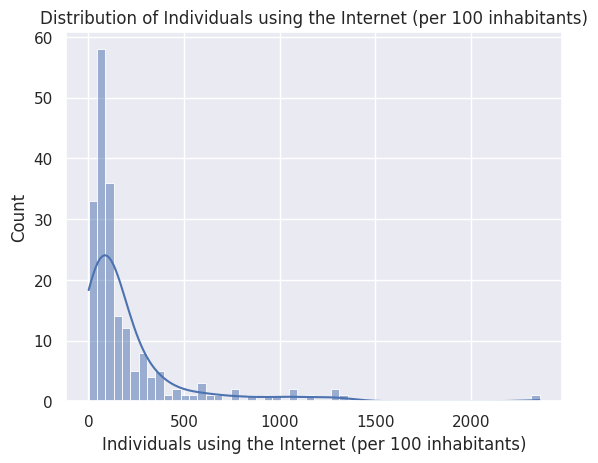

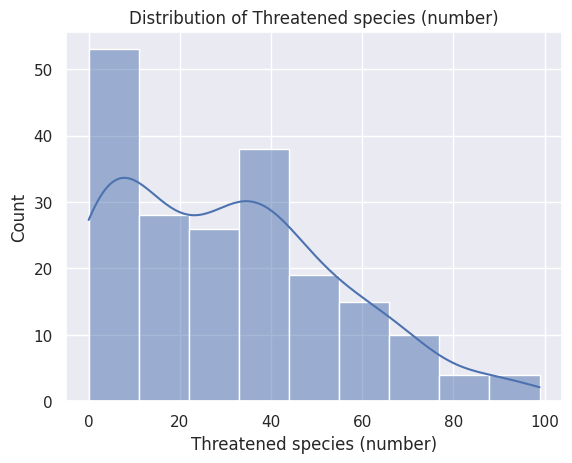

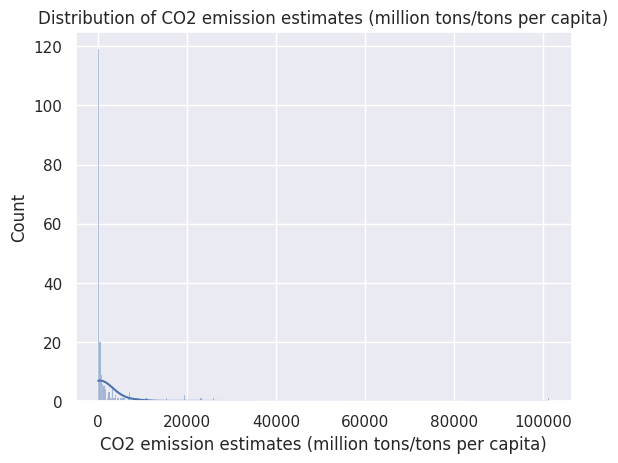

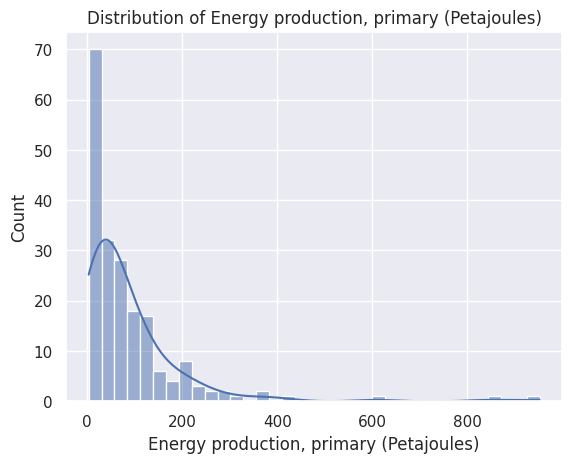

In [20]:
# Checking the distribution of the variables
for variable in variables:
  sns.histplot(df[variable], kde=True)
  plt.title(f'Distribution of {variable}')
  plt.show()

In [ ]:
# We can see that majority of the data skewed so we will have to scale the data

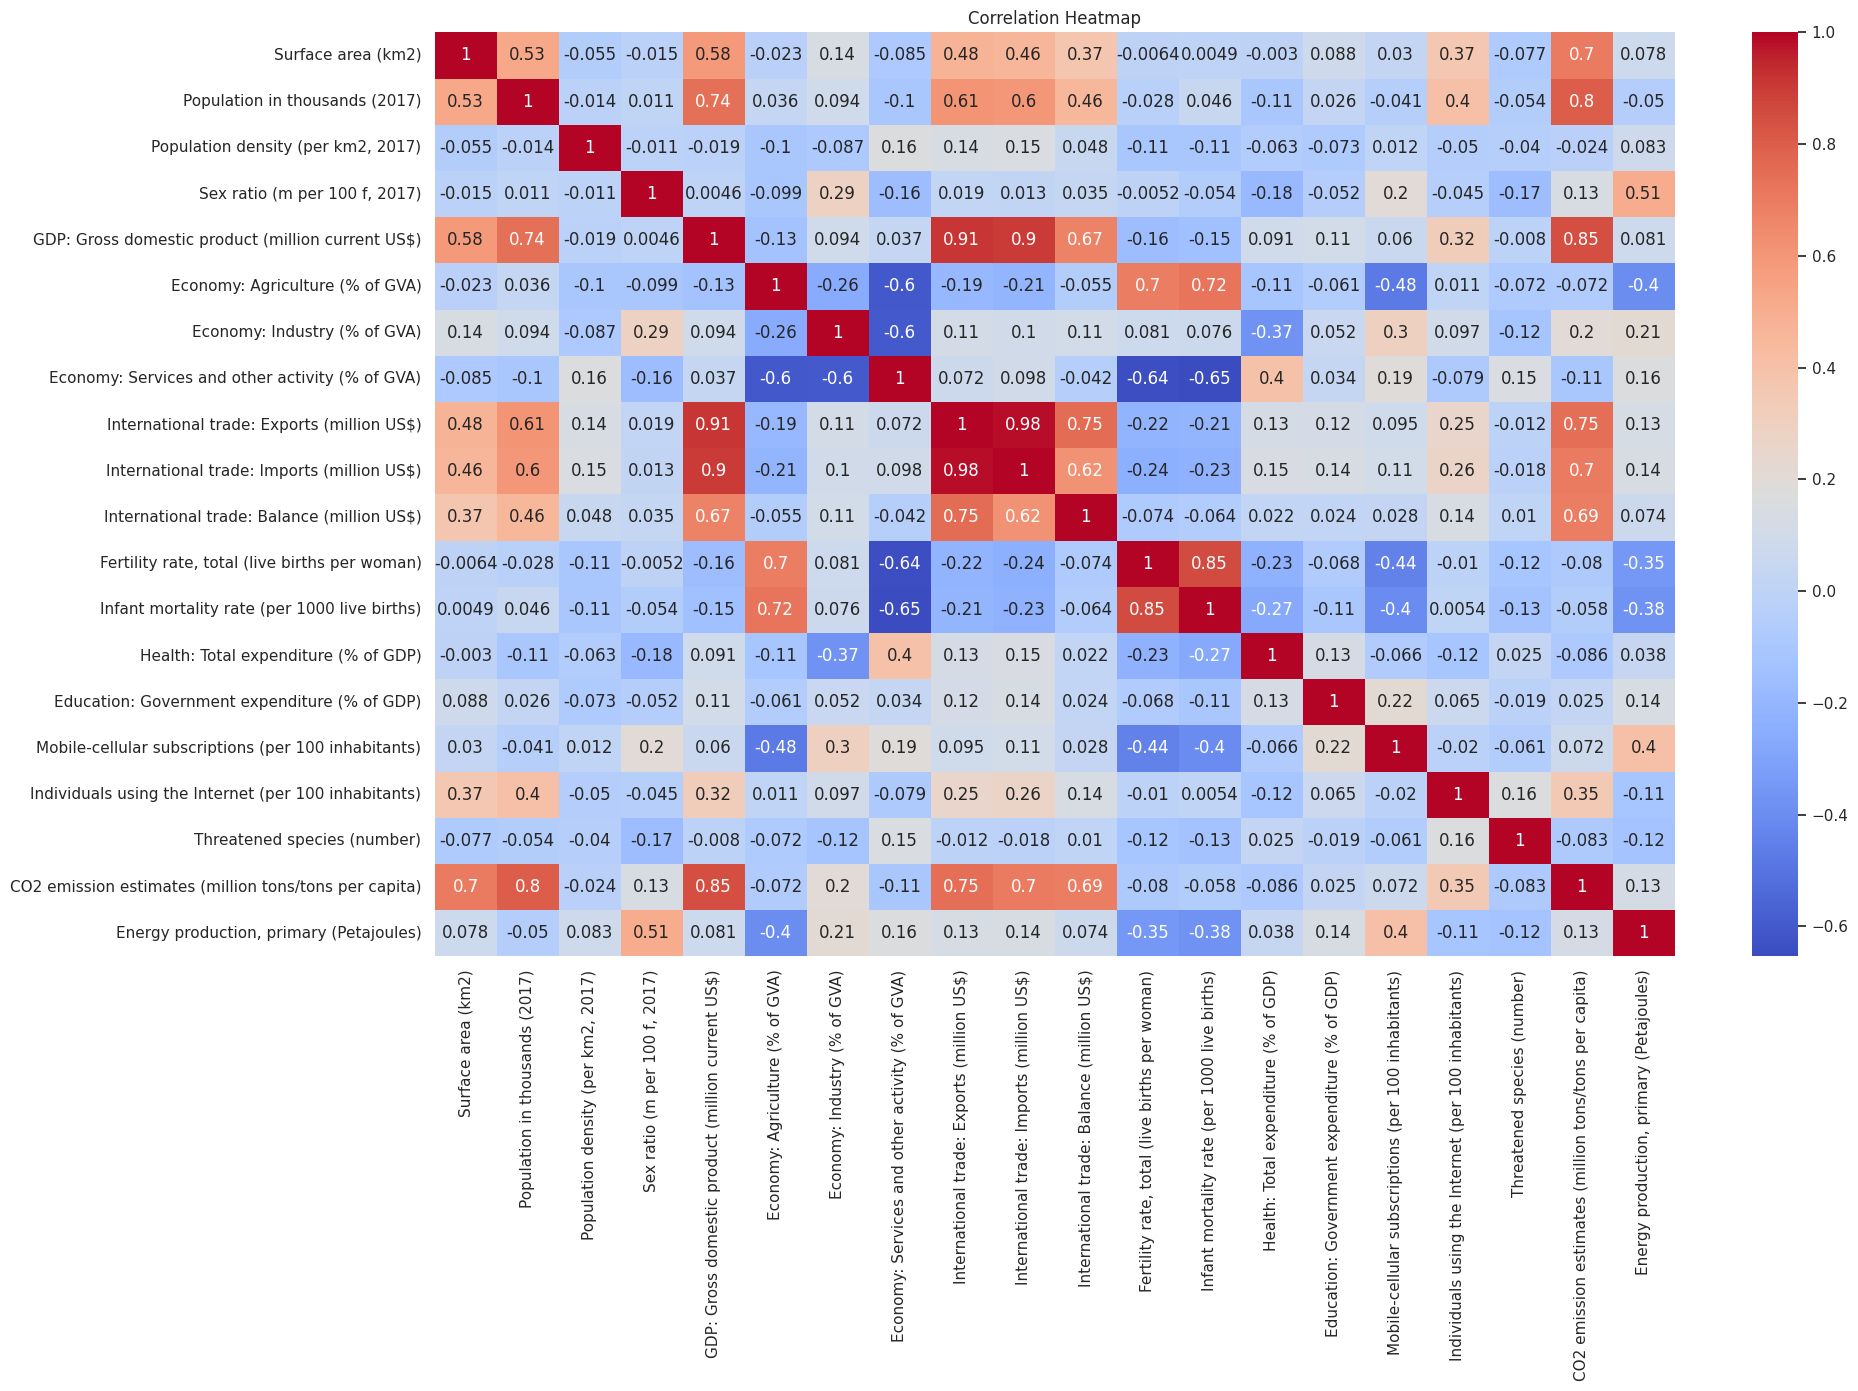

In [21]:
# Checking the correlations
correlation = df[variables].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [22]:
# Now we shall move to Clustering
# So we shall employ PCA since there are many variables in the data

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

pca = PCA()
pca_df = pca.fit(df[variables])

comp = np.cumsum(pca_df.explained_variance_ratio_)
numbers = np.argmax(comp >= 0.90) + 1
print(comp)
print(f"Number of components needed to explain 90% of variance: {numbers}")




[0.80715113 0.9924086  0.9967883  0.99936408 0.99999584 0.99999884
 0.99999997 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Number of components needed to explain 90% of variance: 2


In [23]:
# Since we have find the number of components required

pcadf = PCA(n_components = 2)
pcadf = pcadf.fit_transform(df[variables])

pcadf = pd.DataFrame(pcadf, columns=['PC1', 'PC2'])
pcadf.head()

PC1            PC2
0 -572370.478867   15227.644956
1 -284926.543272  340298.330299
2   -1888.937074 -302725.198801
3 -573169.399003   13934.479258
4 -574016.469291   13204.662144

Text(0, 0.5, 'WCSS')

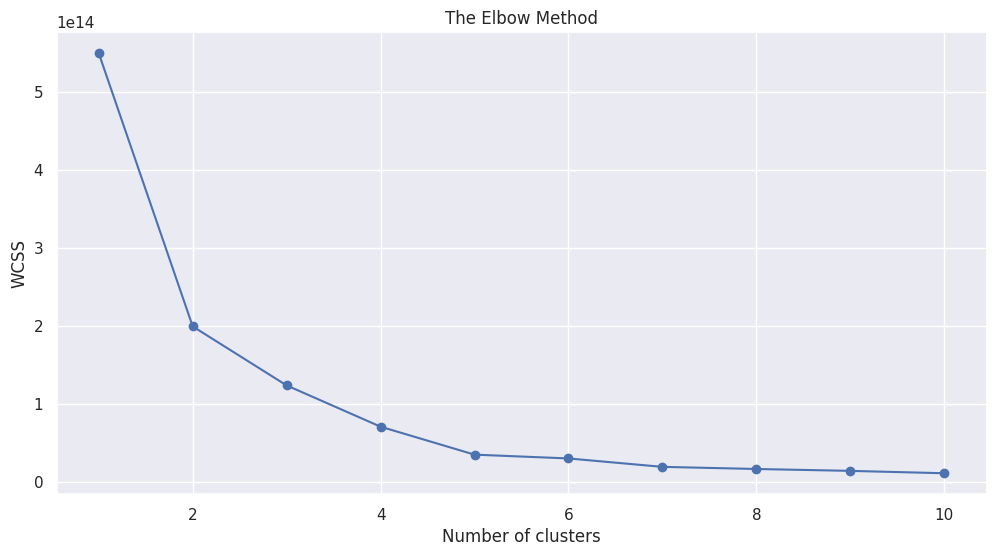

In [24]:
# Now finding the ideal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=42)
    kmeans.fit(pcadf)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette Score')

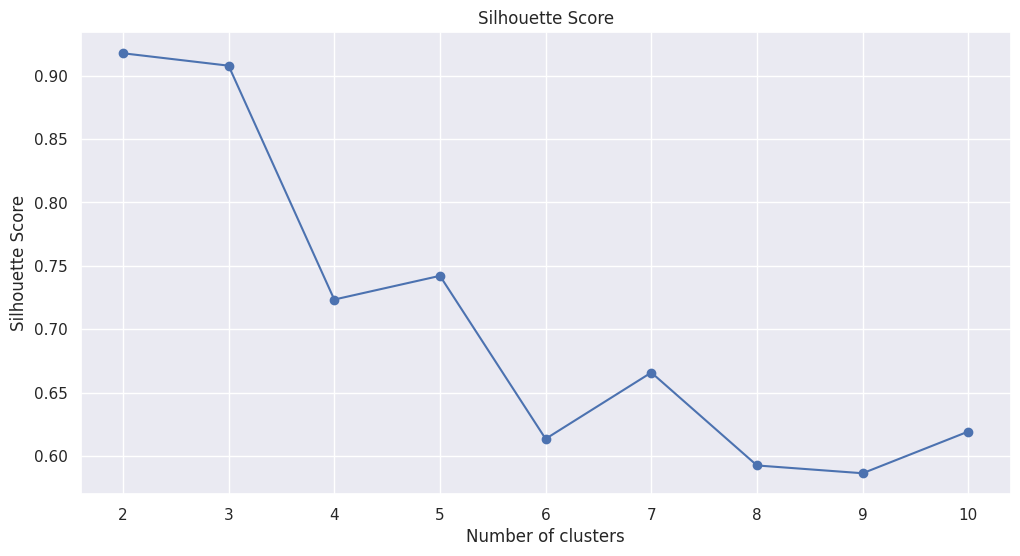

In [25]:
# Checking the silhoutte scores
silt_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=42)
    kmeans.fit(pcadf)
    silt_avg.append(silhouette_score(pcadf, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silt_avg, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


Text(0.5, 0, 'Number of clusters')

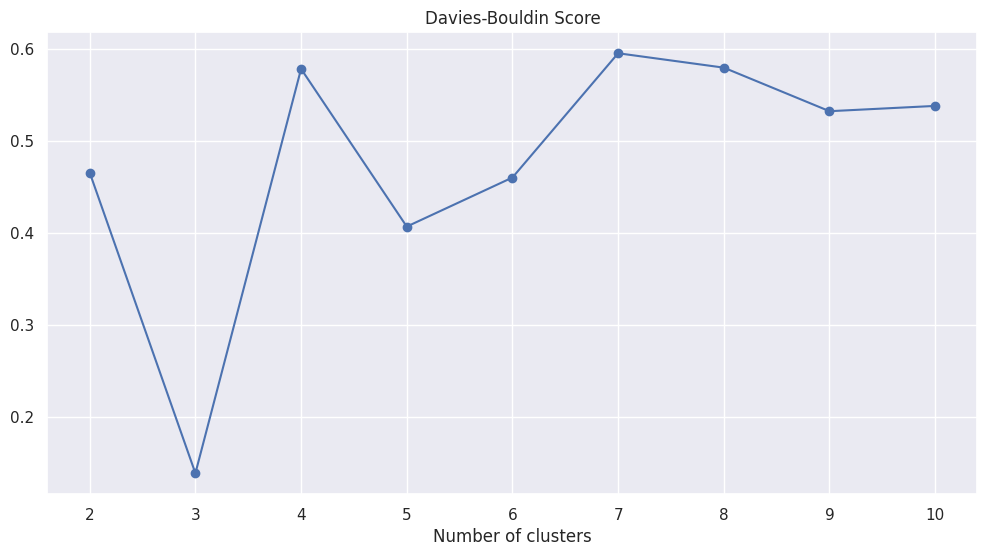

In [26]:
# Davies_bouldin Score

davies_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=4)
    kmeans.fit(pcadf)
    davies_avg.append(davies_bouldin_score(pcadf, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), davies_avg, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters')

In [35]:
## We will use two clusters

kmeans = KMeans(n_clusters=5,
                init='k-means++',
                random_state=42)
kmeans.fit(pcadf)
df['cluster'] = kmeans.labels_

In [36]:
variables.append('cluster')

df[variables].groupby('cluster').mean()

Surface area (km2)  Population in thousands (2017)  \
cluster                                                       
0              1.520253e+05                    1.132531e+04   
1              9.600000e+06                    1.409517e+06   
2              8.730832e+06                    9.012100e+04   
3              1.686161e+06                    1.190019e+05   
4              3.662748e+05                    8.002400e+04   

         Population density (per km2, 2017)  Sex ratio (m per 100 f, 2017)  \
cluster                                                                      
0                                406.465868                     102.150898   
1                                150.100000                     106.300000   
2                                 10.733333                      98.133333   
3                                 63.076190                     101.957143   
4                                235.880000                      96.320000   

         GDP: Gross domestic product (million current US$)  \
cluster                                                      
0                                             8.676220e+04   
1                                             1.115846e+07   
2                                             1.518753e+06   
3                                             3.628577e+05   
4                                             2.969041e+06   

         Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
cluster                                                                  
0                              11.279042                     25.474551   
1                               9.200000                     41.100000   
2                               3.166667                     25.933333   
3                              14.657143                     33.676190   
4                               1.280000                     23.860000   

         Economy: Services and other activity (% of GVA)  \
cluster                                                    
0                                               62.74491   
1                                               49.70000   
2                                               70.90000   
3                                               51.67619   
4                                               74.84000   

         International trade: Exports (million US$)  \
cluster                                               
0                                      3.361032e+04   
1                                      2.118981e+06   
2                                      2.545920e+05   
3                                      6.636695e+04   
4                                      6.703908e+05   

         International trade: Imports (million US$)  \
cluster                                               
0                                      3.410336e+04   
1                                      1.588696e+06   
2                                      2.433040e+05   
3                                      6.867771e+04   
4                                      6.536598e+05   

         International trade: Balance (million US$)  \
cluster                                               
0                                       -465.532934   
1                                     530285.000000   
2                                      11288.000000   
3                                      -2310.571429   
4                                      16731.200000   

         Fertility rate, total (live births per woman)  \
cluster                                                  
0                                             2.669162   
1                                             1.600000   
2                                             1.766667   
3                                             3.652381   
4                                             1.620000   

         Infant mortality rate (per 1000 live births)  \
cluster                

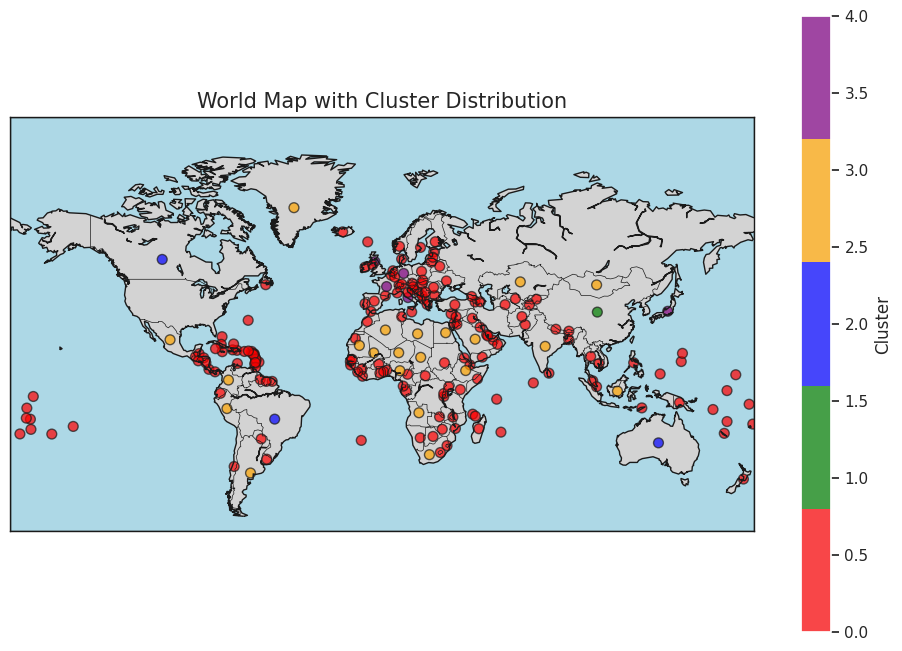

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a distinct colormap with totally different colors (adjust based on the number of clusters)
cmap = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

latitudes = df['latitude']
longitudes = df['longitude']

# Create the map
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Fill continents (background) with light gray and oceans with light blue
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# Convert lat/lon to map projection coordinates
x, y = m(longitudes.values, latitudes.values)

# Plot the points with distinct colors for each cluster
m.scatter(x, y, c=df['cluster'], cmap=cmap, s=50, edgecolor='k', alpha=0.7)

# Add a colorbar with labels for the clusters
plt.colorbar(label="Cluster")

# Add a title and show the plot
plt.title('World Map with Cluster Distribution', fontsize=15)
plt.show()


## Hierachial Clustering

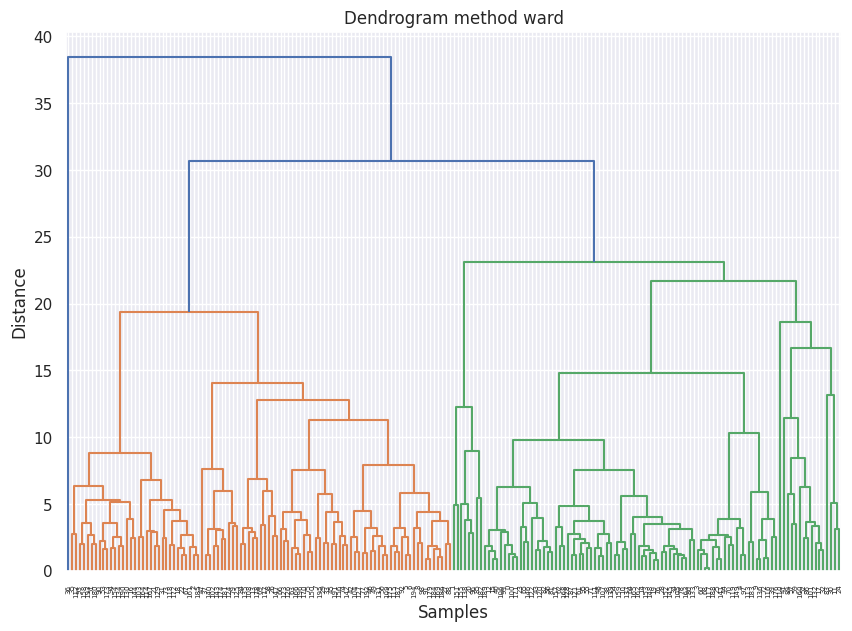

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
features = ['Surface area (km2)', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)', 'GDP: Gross domestic product (million current US$)', 'Economy: Agriculture (% of GVA)', 'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)', 'International trade: Exports (million US$)', 'International trade: Imports (million US$)',
       'International trade: Balance (million US$)', 'Fertility rate, total (live births per woman)','Infant mortality rate (per 1000 live births)','Health: Total expenditure (% of GDP)',
       'Education: Government expenditure (% of GDP)','Mobile-cellular subscriptions (per 100 inhabitants)','Individuals using the Internet (per 100 inhabitants)',
       'Threatened species (number)','CO2 emission estimates (million tons/tons per capita)','Energy production, primary (Petajoules)']
data_scaled = scale.fit_transform(df[features])

# Perform Hierarchical Clustering (Ward's method)


Z = linkage(data_scaled, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram method ward')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


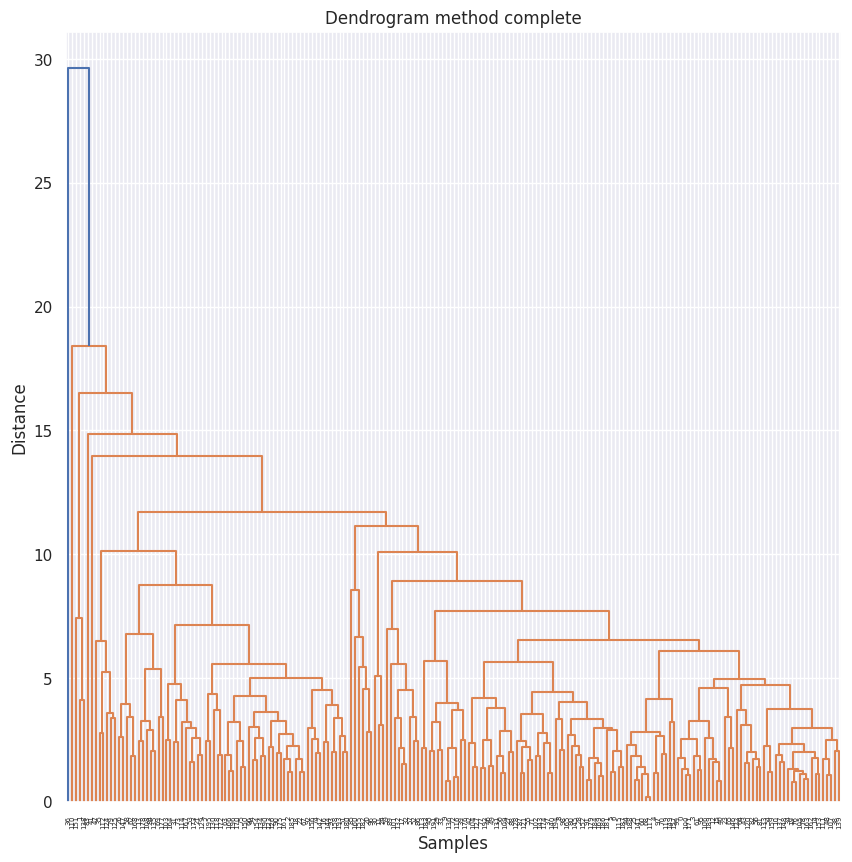

In [42]:
# Perform Hierarchical Clustering (Complete method)
Z = linkage(data_scaled, method='complete')
# Plotting the Dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Dendrogram method complete')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

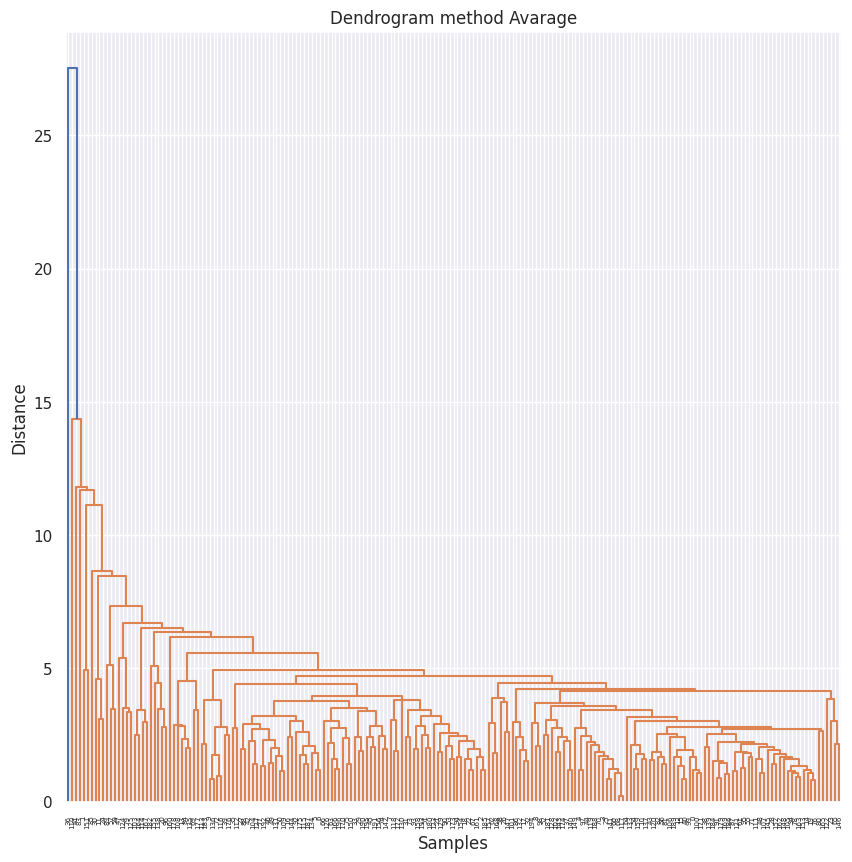

In [43]:
# Perform Hierarchical Clustering (Avarage method)
Z = linkage(data_scaled, method='average')
# Plotting the Dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Dendrogram method Avarage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

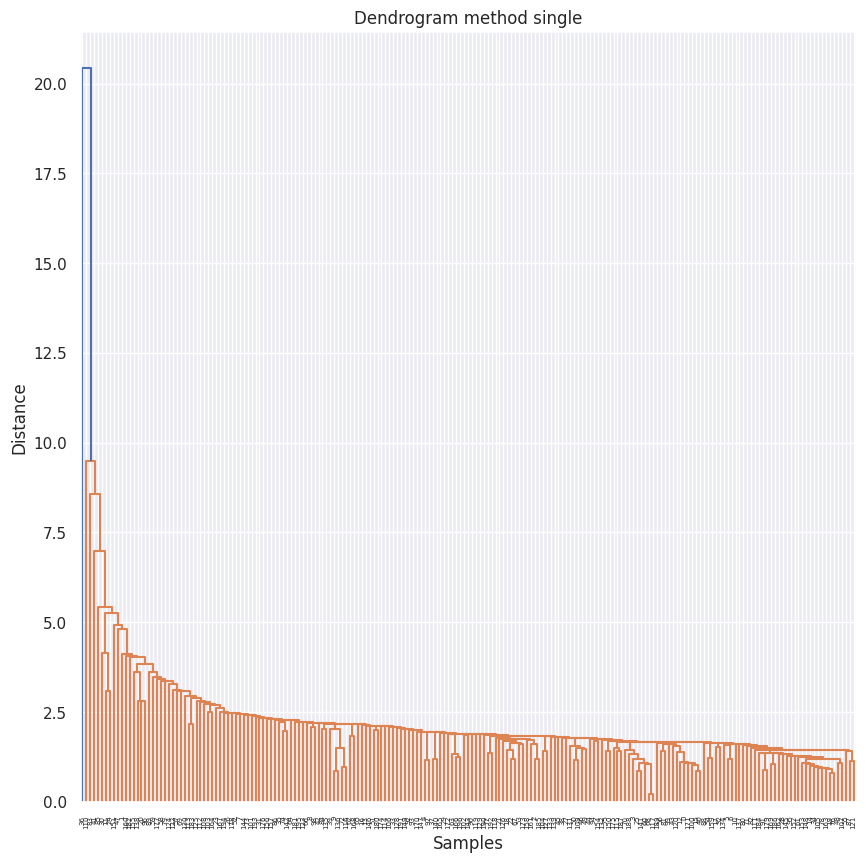

In [44]:
# Perform Hierarchical Clustering (single method)
Z = linkage(data_scaled, method='single')
# Plotting the Dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Dendrogram method single')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [45]:

from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist



# Defining linkage methods to compare
linkage_methods = ['single', 'complete', 'average', 'ward']

cophenetic_corrs = {}

# Loop through different linkage methods
for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(data_scaled, method=method)

    # Compute the cophenetic correlation coefficient
    coph_corr, _ = cophenet(Z, pdist(data_scaled))

    # Store the cophenetic correlation coefficient
    cophenetic_corrs[method] = coph_corr

# Convert to a DataFrame for easier viewing
cophenetic_corr_df = pd.DataFrame(list(cophenetic_corrs.items()), columns=['Linkage Method', 'Cophenetic Correlation'])

# Display the cophenetic correlation coefficients for each method
print(cophenetic_corr_df)



  Linkage Method  Cophenetic Correlation
0         single                0.916271
1       complete                0.785083
2        average                0.941993
3           ward                0.380104


In [46]:

# We shall use average linkage method since it has the highest cophenetic correlation
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3,
                                  metric = 'euclidean',
                                  linkage = 'average'
                                 )

cluster.fit(data_scaled)
labels = cluster.labels_

df['Clusters'] = labels

In [47]:
features.append('Clusters')
df[features].groupby('Clusters').mean()

Surface area (km2)  Population in thousands (2017)  \
Clusters                                                       
0               4.554948e+05                    2.595288e+04   
1               9.600000e+06                    1.409517e+06   
2               2.000000e+00                    3.900000e+01   

          Population density (per km2, 2017)  Sex ratio (m per 100 f, 2017)  \
Clusters                                                                      
0                                 227.929231                     101.956923   
1                                 150.100000                     106.300000   
2                               25969.800000                      94.700000   

          GDP: Gross domestic product (million current US$)  \
Clusters                                                      
0                                              2.128436e+05   
1                                              1.115846e+07   
2                                              6.258000e+03   

          Economy: Agriculture (% of GVA)  Economy: Industry (% of GVA)  \
Clusters                                                                  
0                               11.315897                     26.385385   
1                                9.200000                     41.100000   
2                                0.700000                     13.400000   

          Economy: Services and other activity (% of GVA)  \
Clusters                                                    
0                                               61.866154   
1                                               49.700000   
2                                               86.600000   

          International trade: Exports (million US$)  \
Clusters                                               
0                                       5.499655e+04   
1                                       2.118981e+06   
2                                       3.980330e+05   

          International trade: Imports (million US$)  \
Clusters                                               
0                                       5.519482e+04   
1                                       1.588696e+06   
2                                       3.727130e+05   

          International trade: Balance (million US$)  \
Clusters                                               
0                                        -174.702564   
1                                      530285.000000   
2                                       25321.000000   

          Fertility rate, total (live births per woman)  \
Clusters                                                  
0                                              2.740256   
1                                              1.600000   
2                                              1.500000   

          Infant mortality rate (per 1000 live births)  \
Clusters                                                 
0                                            23.835128   
1                                            11.600000   
2                                             3.400000   

          Health: Total expenditure (% of GDP)  \
Clusters                                         
0                                     6.964359   
1                                     5.500000   
2                                     4.300000   

          Education: Government expenditure (% of GDP)  \
Clusters                                                 
0                                              3.45359   
1                                              3.60000   
2                                              1.00000   

          Mobile-cellular subscriptions (per 100 inhabitants)  \
Clusters                                                        
0                                                104.297179     
1                                                 93.200000     
2                                                 88.800000    

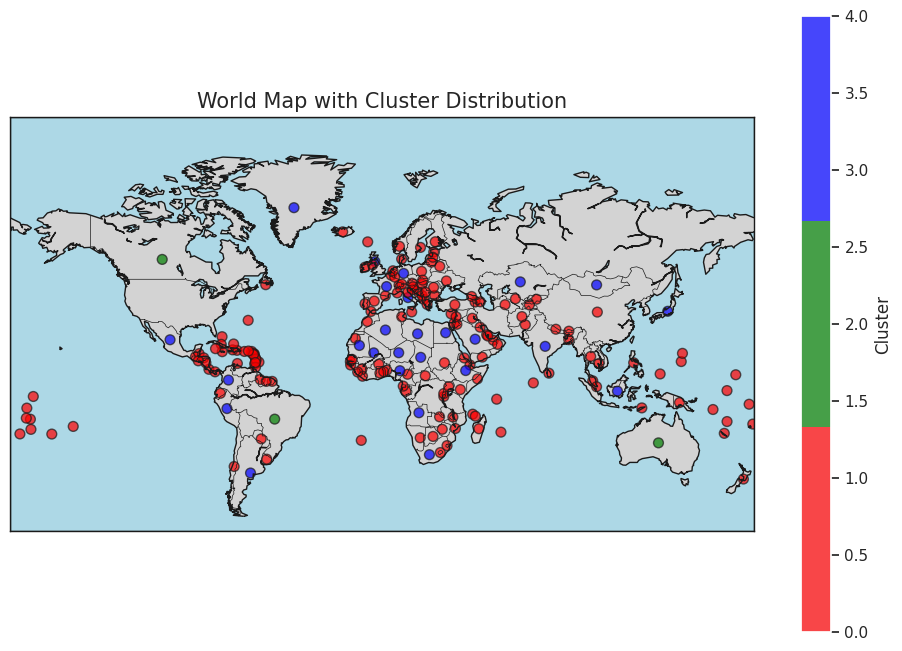

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a distinct colormap with totally different colors (adjust based on the number of clusters)
cmap = ListedColormap(['red', 'green', 'blue'])

latitudes = df['latitude']
longitudes = df['longitude']

# Create the map
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Fill continents (background) with light gray and oceans with light blue
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# Convert lat/lon to map projection coordinates
x, y = m(longitudes.values, latitudes.values)

# Plot the points with distinct colors for each cluster
m.scatter(x, y, c=df['cluster'], cmap=cmap, s=50, edgecolor='k', alpha=0.7)

# Add a colorbar with labels for the clusters
plt.colorbar(label="Cluster")

# Add a title and show the plot
plt.title('World Map with Cluster Distribution', fontsize=15)
plt.show()
